# Loading the dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings("ignore")
!pip install pandas-profiling[notebook]

In [ ]:
# This should run for all everyone
url = 'https://drive.google.com/file/d/1yruyN0GYpe0SiyyE57rXxANk1Mz0ckhX/view?usp=sharing'
url='https://drive.google.com/uc?id=' +url.split('/')[-2]

In [ ]:
df=pd.read_csv(url)
df

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0             Urban             228.69  36.6  formerly smoked       1  
1             Rural             105.92  32.5     never smoked       1  
2             Urban             171.23  34.4           smokes       1  
3             Rural             174.12  24.0     never smoked       1  
4             Urban             186.21  29.0  formerly smoked       1  
...             ...                ...   ...              ...     ...  
4976          Rural              70.15  29.8  formerly smoked       0  
4977          Urban             191.15  31.1           smokes       0  
4978          Rural              95.02  31.8           smokes       0  
4979          Rural              83.94  30.0           smokes       0  
4980          Urban              83.75  29.1     never smoked       0  

[4981 rows x 11 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


From this information we can say that both Categorical and numerical features are present.


1.   Categorical Features: gender, ever_married, work_type, Residence_type, smoking_status
2.   Binary Numerical Features: hypertension,heart_disease, stroke
3.  Continous Numerical Features: age, avg_glucose_level, bmi






In [ ]:
df.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  4981.000000   4981.000000    4981.000000        4981.000000   
mean     43.419859      0.096165       0.055210         105.943562   
std      22.662755      0.294848       0.228412          45.075373   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.230000   
50%      45.000000      0.000000       0.000000          91.850000   
75%      61.000000      0.000000       0.000000         113.860000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4981.000000  4981.000000  
mean     28.498173     0.049789  
std       6.790464     0.217531  
min      14.000000     0.000000  
25%      23.700000     0.000000  
50%      28.100000     0.000000  
75%      32.600000     0.000000  
max      48.900000     1.000000

Checking Unknown Values:

In [ ]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Visualization

<Figure size 1000x1000 with 0 Axes>

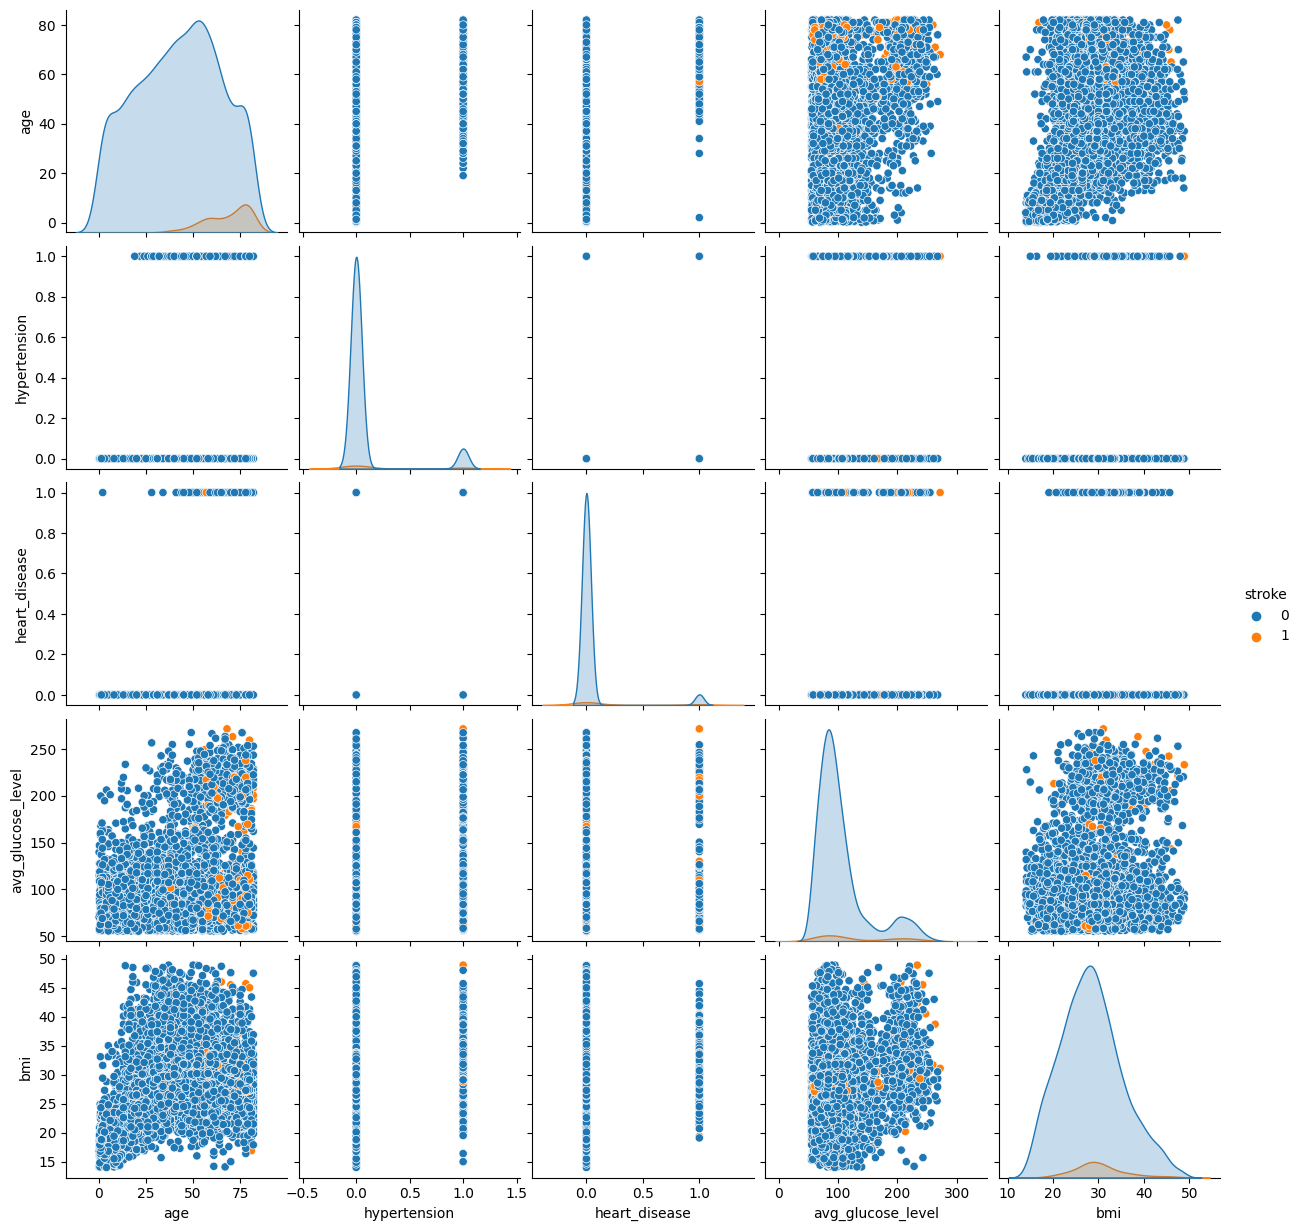

In [ ]:
plt.figure(figsize=(10,10))
sns.pairplot(df,hue='stroke')
plt.show()

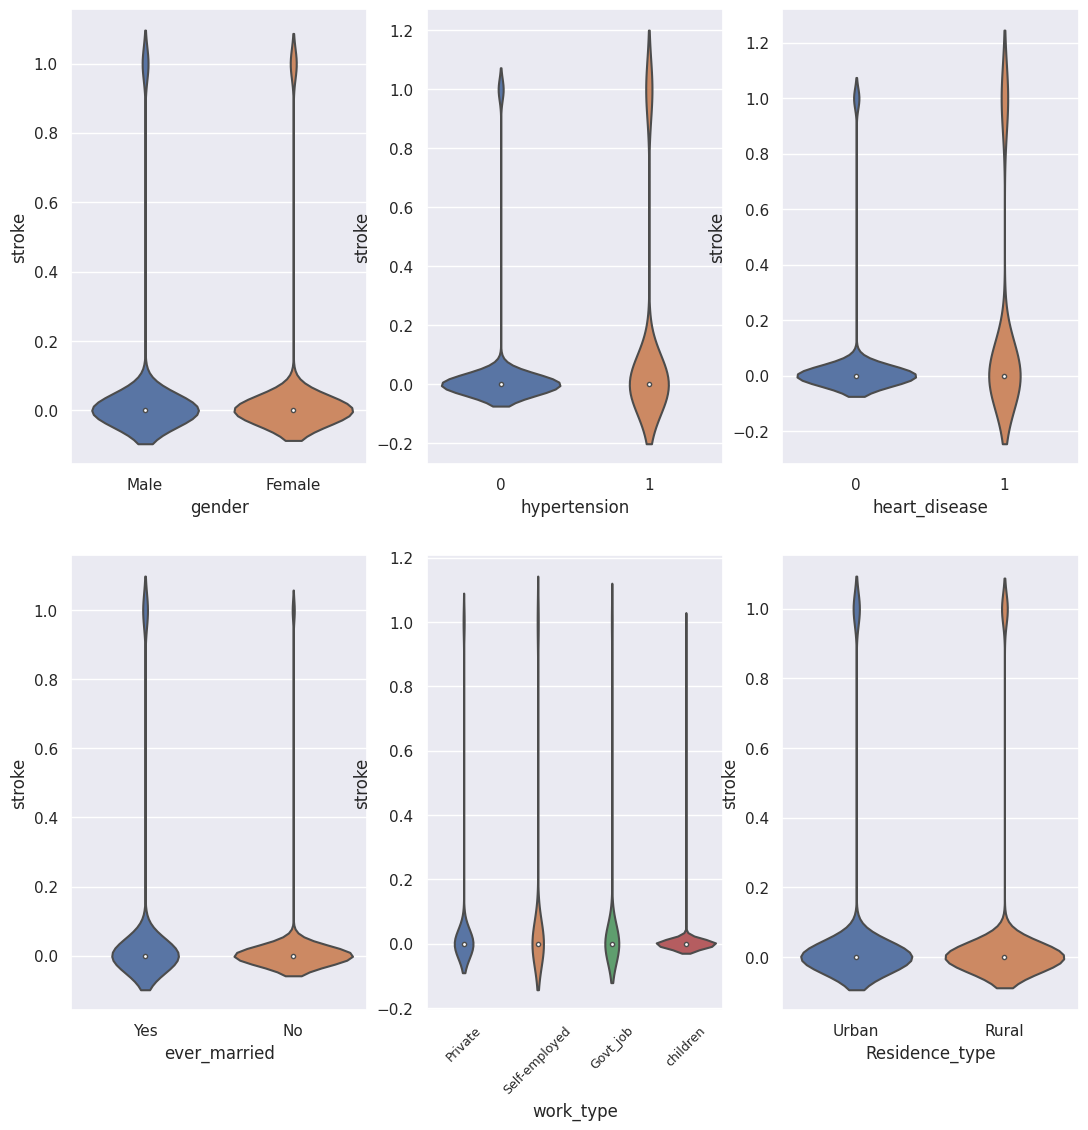

In [ ]:
plt.figure(figsize=(13,13))
sns.set_theme(style="darkgrid")
plt.subplot(2,3,1)
sns.violinplot(x = 'gender', y = 'stroke', data = df)
plt.subplot(2,3,2)
sns.violinplot(x = 'hypertension', y = 'stroke', data = df)
plt.subplot(2,3,3)
sns.violinplot(x = 'heart_disease', y = 'stroke', data = df)
plt.subplot(2,3,4)
sns.violinplot(x = 'ever_married', y = 'stroke', data = df)
plt.subplot(2,3,5)
sns.violinplot(x = 'work_type', y = 'stroke', data = df)
plt.xticks(fontsize=9, rotation=45)
plt.subplot(2,3,6)
sns.violinplot(x = 'Residence_type', y = 'stroke', data = df)
plt.show()

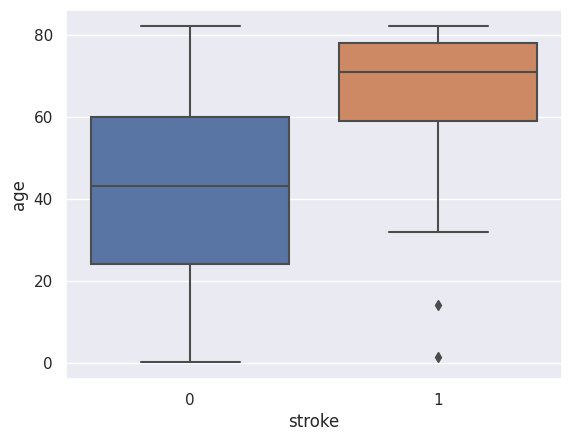

In [ ]:
sns.boxplot(data=df,y='age',x='stroke')
plt.show()

We can clearly see that almost all the people who suffered from brain stroke were from age group >60.
Hence, old people have a greater chance of getting a brain stroke.

Text(0, 0.5, 'Count')

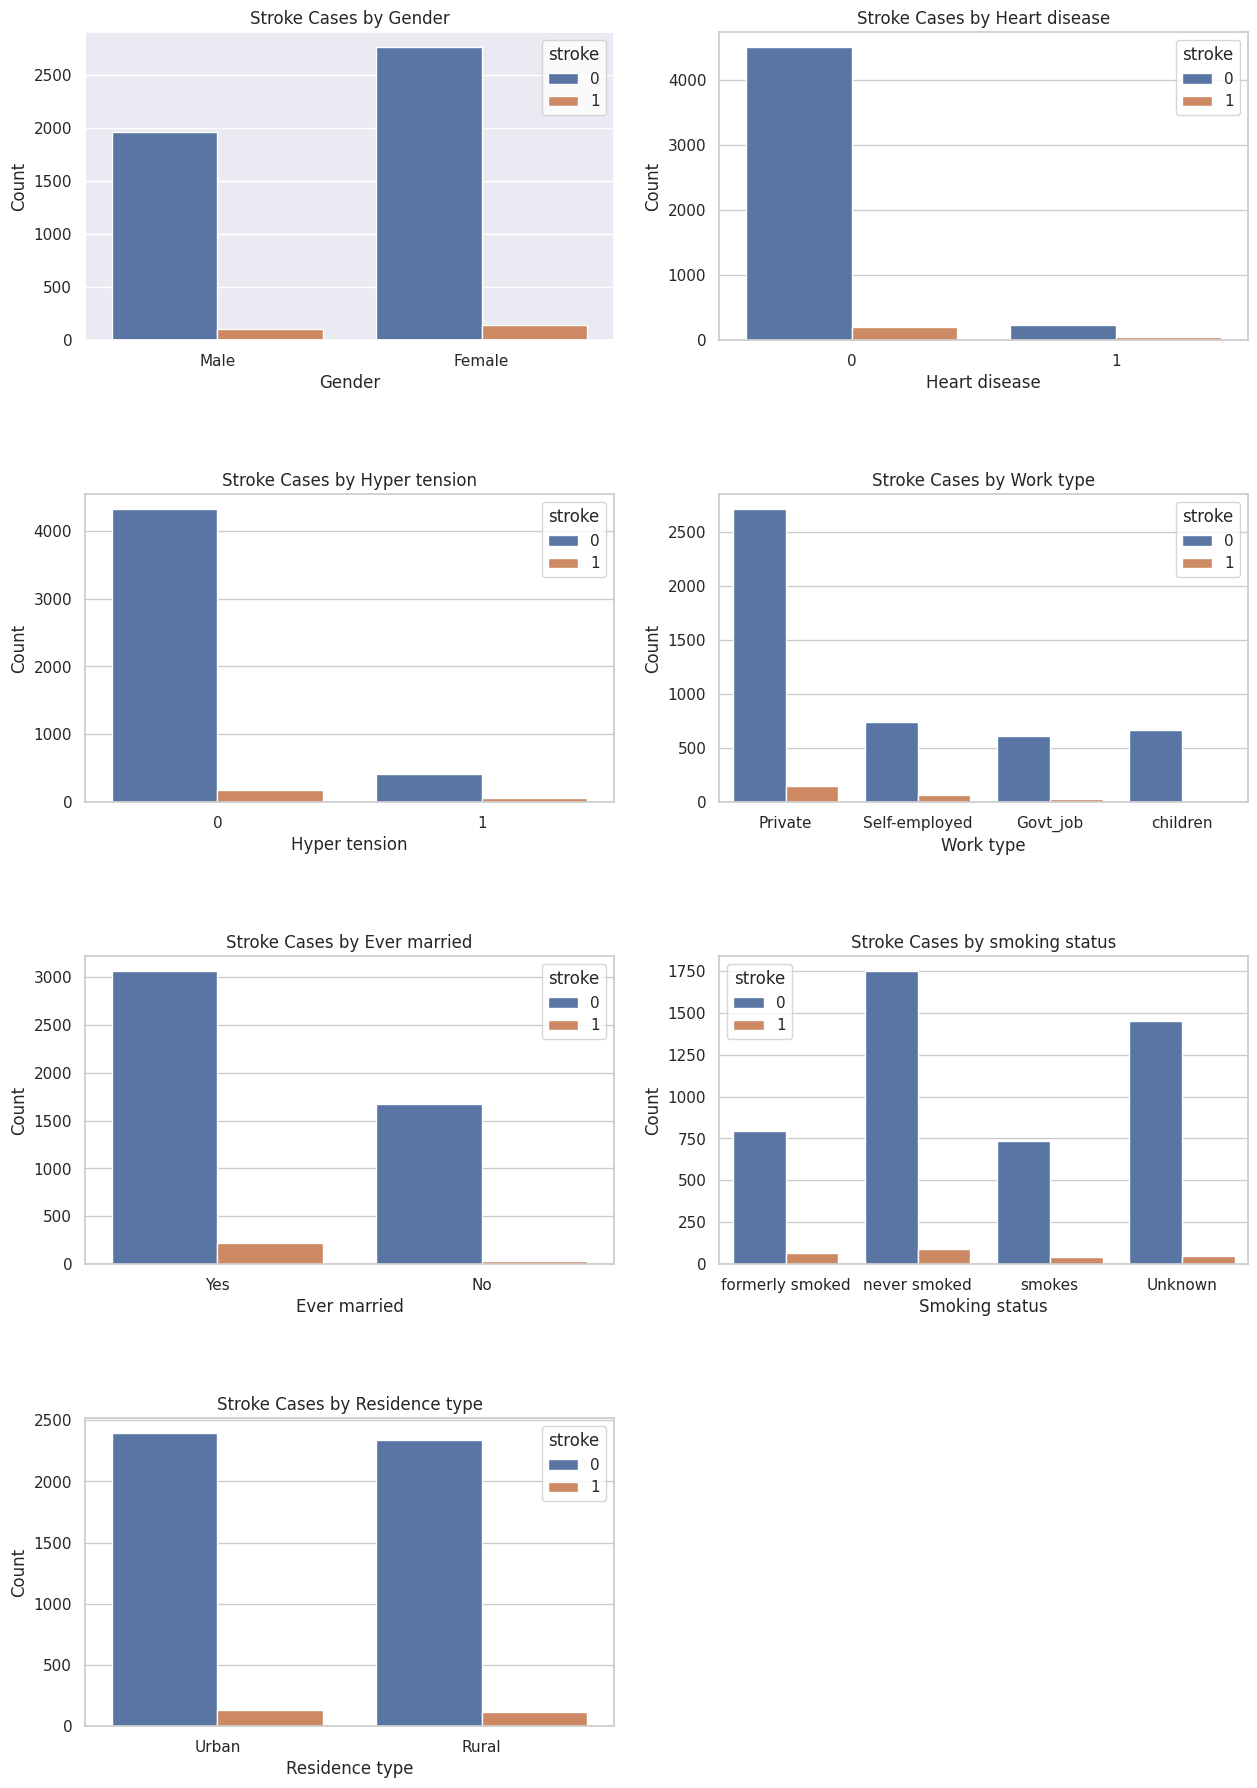

In [ ]:
df1 = pd.read_csv(url)
plt.figure(figsize=(15, 40))
plt.subplots_adjust(hspace=0.5)
plt.subplot(7,2,1)
sns.set_theme(style="whitegrid")
sns.countplot(x=df1['gender'], hue=df1['stroke'])
plt.title('Stroke Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.subplot(7,2,2)
sns.countplot(x=df1['heart_disease'], hue=df1['stroke'])
plt.title('Stroke Cases by Heart disease')
plt.xlabel('Heart disease')
plt.ylabel('Count')

plt.subplot(7,2,3)
sns.countplot(x=df1['hypertension'], hue=df1['stroke'])
plt.title('Stroke Cases by Hyper tension')
plt.xlabel('Hyper tension')
plt.ylabel('Count')

plt.subplot(7,2,4)
sns.countplot(x=df1['work_type'], hue=df1['stroke'])
plt.title('Stroke Cases by Work type')
plt.xlabel('Work type')
plt.ylabel('Count')

plt.subplot(7,2,5)
sns.countplot(x=df1['ever_married'], hue=df1['stroke'])
plt.title('Stroke Cases by Ever married')
plt.xlabel('Ever married')
plt.ylabel('Count')

plt.subplot(7,2,6)
sns.countplot(x=df1['smoking_status'], hue=df1['stroke'])
plt.title('Stroke Cases by smoking status')
plt.xlabel('Smoking status')
plt.ylabel('Count')

plt.subplot(7,2,7)
sns.countplot(x=df1['Residence_type'], hue=df1['stroke'])
plt.title('Stroke Cases by Residence type')
plt.xlabel('Residence type')
plt.ylabel('Count')


From the countplots, we can see that count of stoke cases is not directly relating to any specific feature column.

In [ ]:
import plotly.graph_objs as go
trace = go.Scatter3d(
    x=df['age'],
    y=df['bmi'],
    z= df['avg_glucose_level'],
    mode='markers',
    marker=dict(
        size=4,
        color=df['stroke'],
        colorscale='Viridis',
        opacity=1
    )
)
layout = go.Layout(
    scene=dict(
        xaxis_title='Age',
        yaxis_title='BMI',
        zaxis_title='Avg Glucose Level'
    ),
    title='3D Plot of Age, BMI, and Glucose Level vs. Stroke'
)
fig = go.Figure(data=[trace], layout=layout)
fig.show()

From the plot, we can have the following inferences:


1.   Old age people (age>60) have more chances of a brain stroke.  
2.   BMI does not seem to have a correlation with brain stroke, as people from all range of BMI have seem to suffer from brain stroke.
3. Same goes for Glucose level as it also does not have a straight relation with stroke.  



<Axes: >

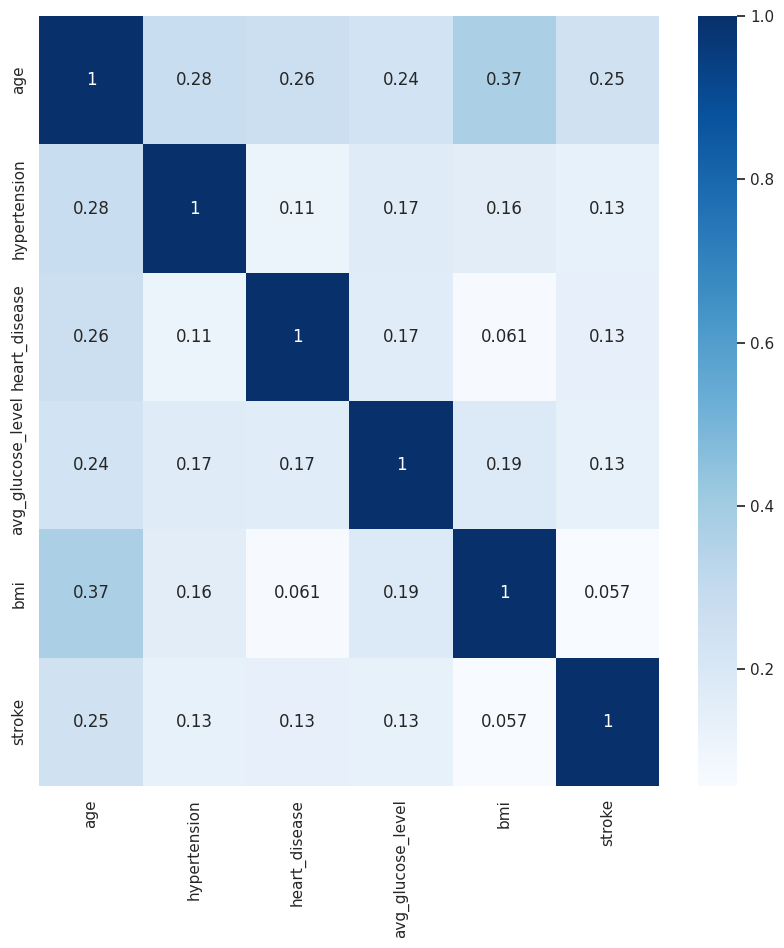

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, cmap = "Blues")

In [ ]:
print(df.corr()['stroke'].abs().sort_values(ascending=False))

stroke               1.000000
age                  0.246478
heart_disease        0.134610
avg_glucose_level    0.133227
hypertension         0.131965
bmi                  0.056926
Name: stroke, dtype: float64


From the correlation plot, we can have the following inferences:


1.   Age has the highest correlation with stroke. As also seen from other kinds of plots that people of age>60 have higher chance of suffering from stroke.
2.  All other features do not seem to have a correlation with stroke.
3. Also, BMI and age have some correlation, meaning people of old age have a greater bmi.



0    4733
1     248
Name: stroke, dtype: int64


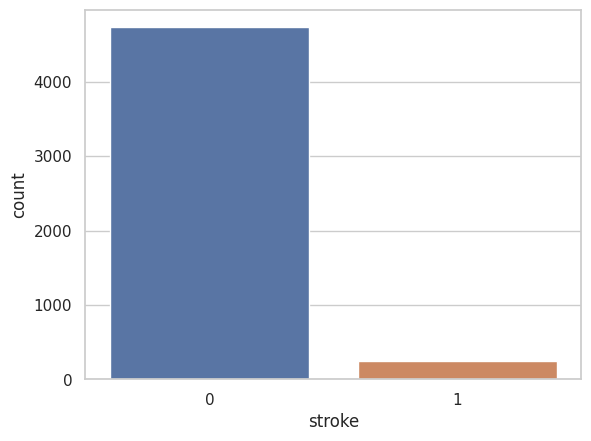

In [ ]:
print(df['stroke'].value_counts())
ax = sns.countplot(data=df, x="stroke")
plt.show()

From the plot, we can see that we have only 248 datapoints of positive class i.e, only 4.98% of datapoints belong to positive class.
Hence, ,this is a highly unbalanced data distribution and we would have to do oversampling to obtain good results on the dataset.

Text(0.5, 1.0, 'Propagation of bmi by smoking_status')

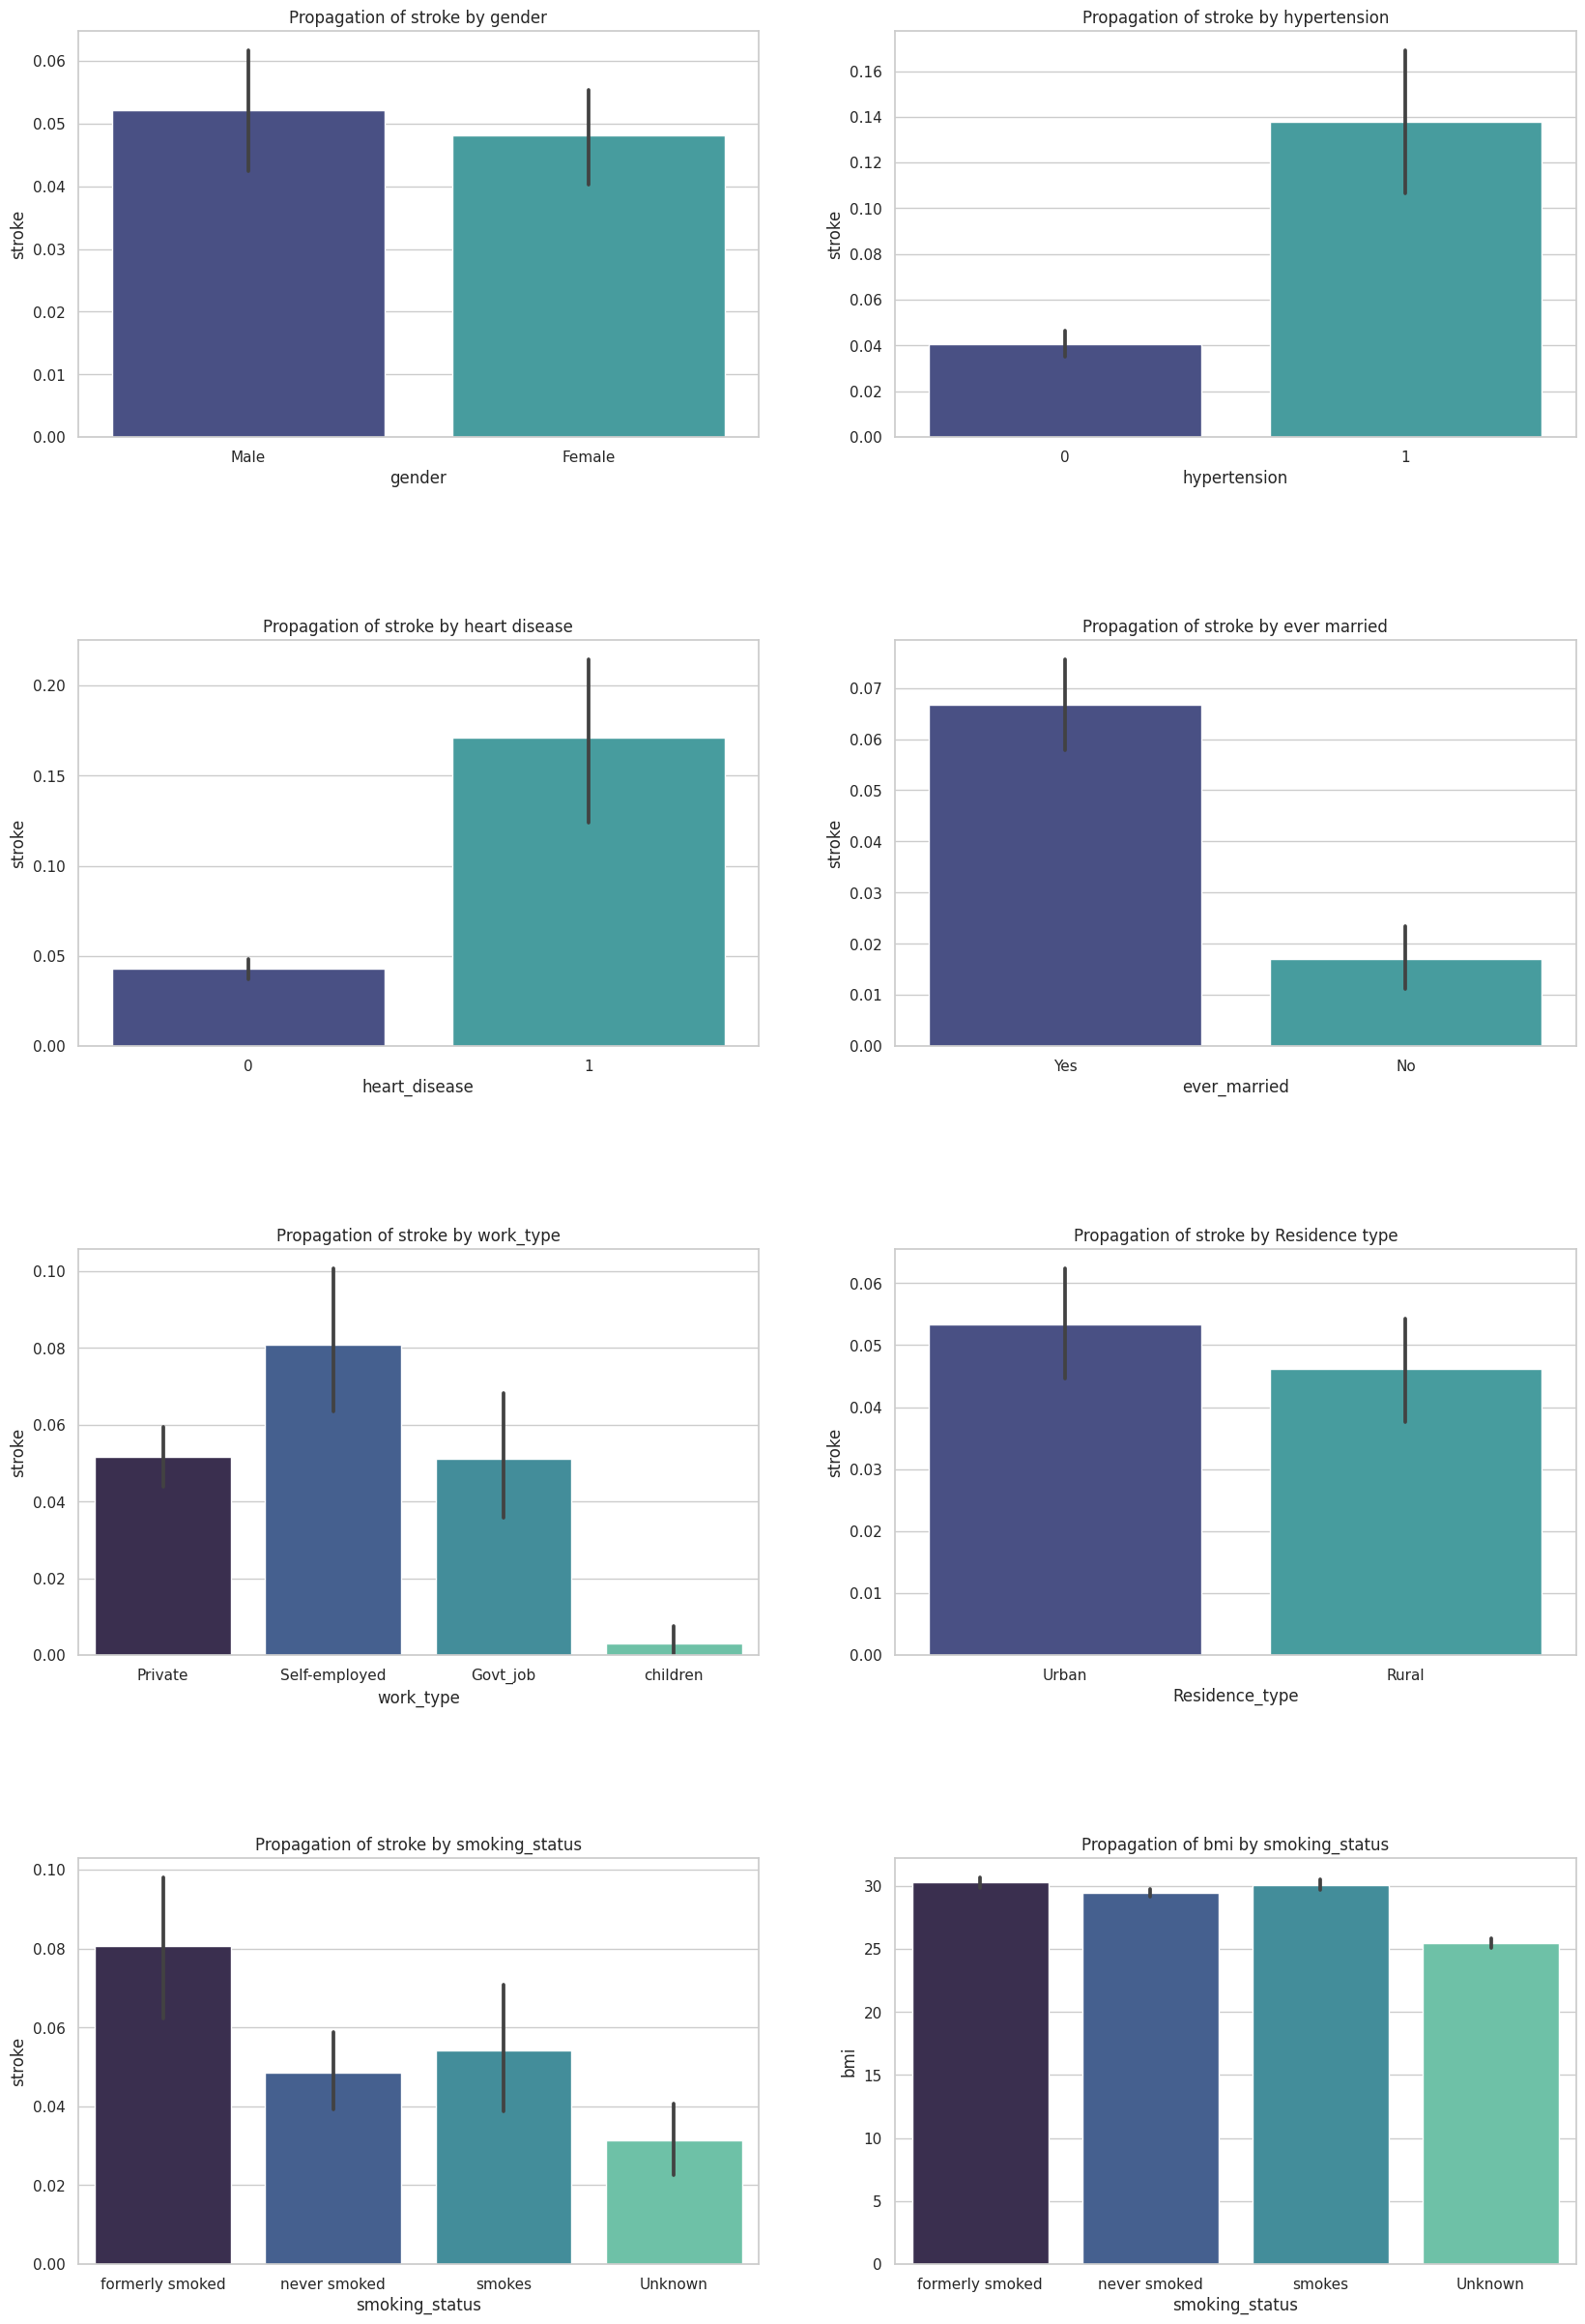

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 30))
fig.subplots_adjust(hspace=0.5)
sns.barplot(data=df, x='gender', y='stroke', palette='mako', ax=axs[0,0])
axs[0,0].set_title('Propagation of stroke by gender')
sns.barplot(data=df, x='hypertension', y='stroke', palette='mako', ax=axs[0,1])
axs[0,1].set_title('Propagation of stroke by hypertension')
sns.barplot(data=df, x='heart_disease', y='stroke', palette='mako', ax=axs[1,0])
axs[1,0].set_title('Propagation of stroke by heart disease')
sns.barplot(data=df, x='ever_married', y='stroke', palette='mako', ax=axs[1,1])
axs[1,1].set_title('Propagation of stroke by ever married')
sns.barplot(data=df, x='work_type', y='stroke', palette='mako', ax=axs[2,0])
axs[2,0].set_title('Propagation of stroke by work_type')
sns.barplot(data=df, x='Residence_type', y='stroke', palette='mako', ax=axs[2,1])
axs[2,1].set_title('Propagation of stroke by Residence type')
sns.barplot(data=df, x='smoking_status', y='stroke', palette='mako', ax=axs[3,0])
axs[3,0].set_title('Propagation of stroke by smoking_status')
sns.barplot(data=df, x='smoking_status', y='bmi', palette='mako', ax=axs[3,1])
axs[3,1].set_title('Propagation of bmi by smoking_status')

From the plots, we have the following inferences:


1.   Both gender have almost similar chances of suffering from stroke. It is not skewed to any specific gender. Same goes for Residence (urban-rural) and work type.  
2.  People with hypertension, heart disease tend to have a higher chance of a brain stroke as they have more cases of stroke.
3. We cannot infer anything from ever-married feature as of now,but one can guess that people who are not married would be of less age than people who are married, hence married people have more chances of stroke.  



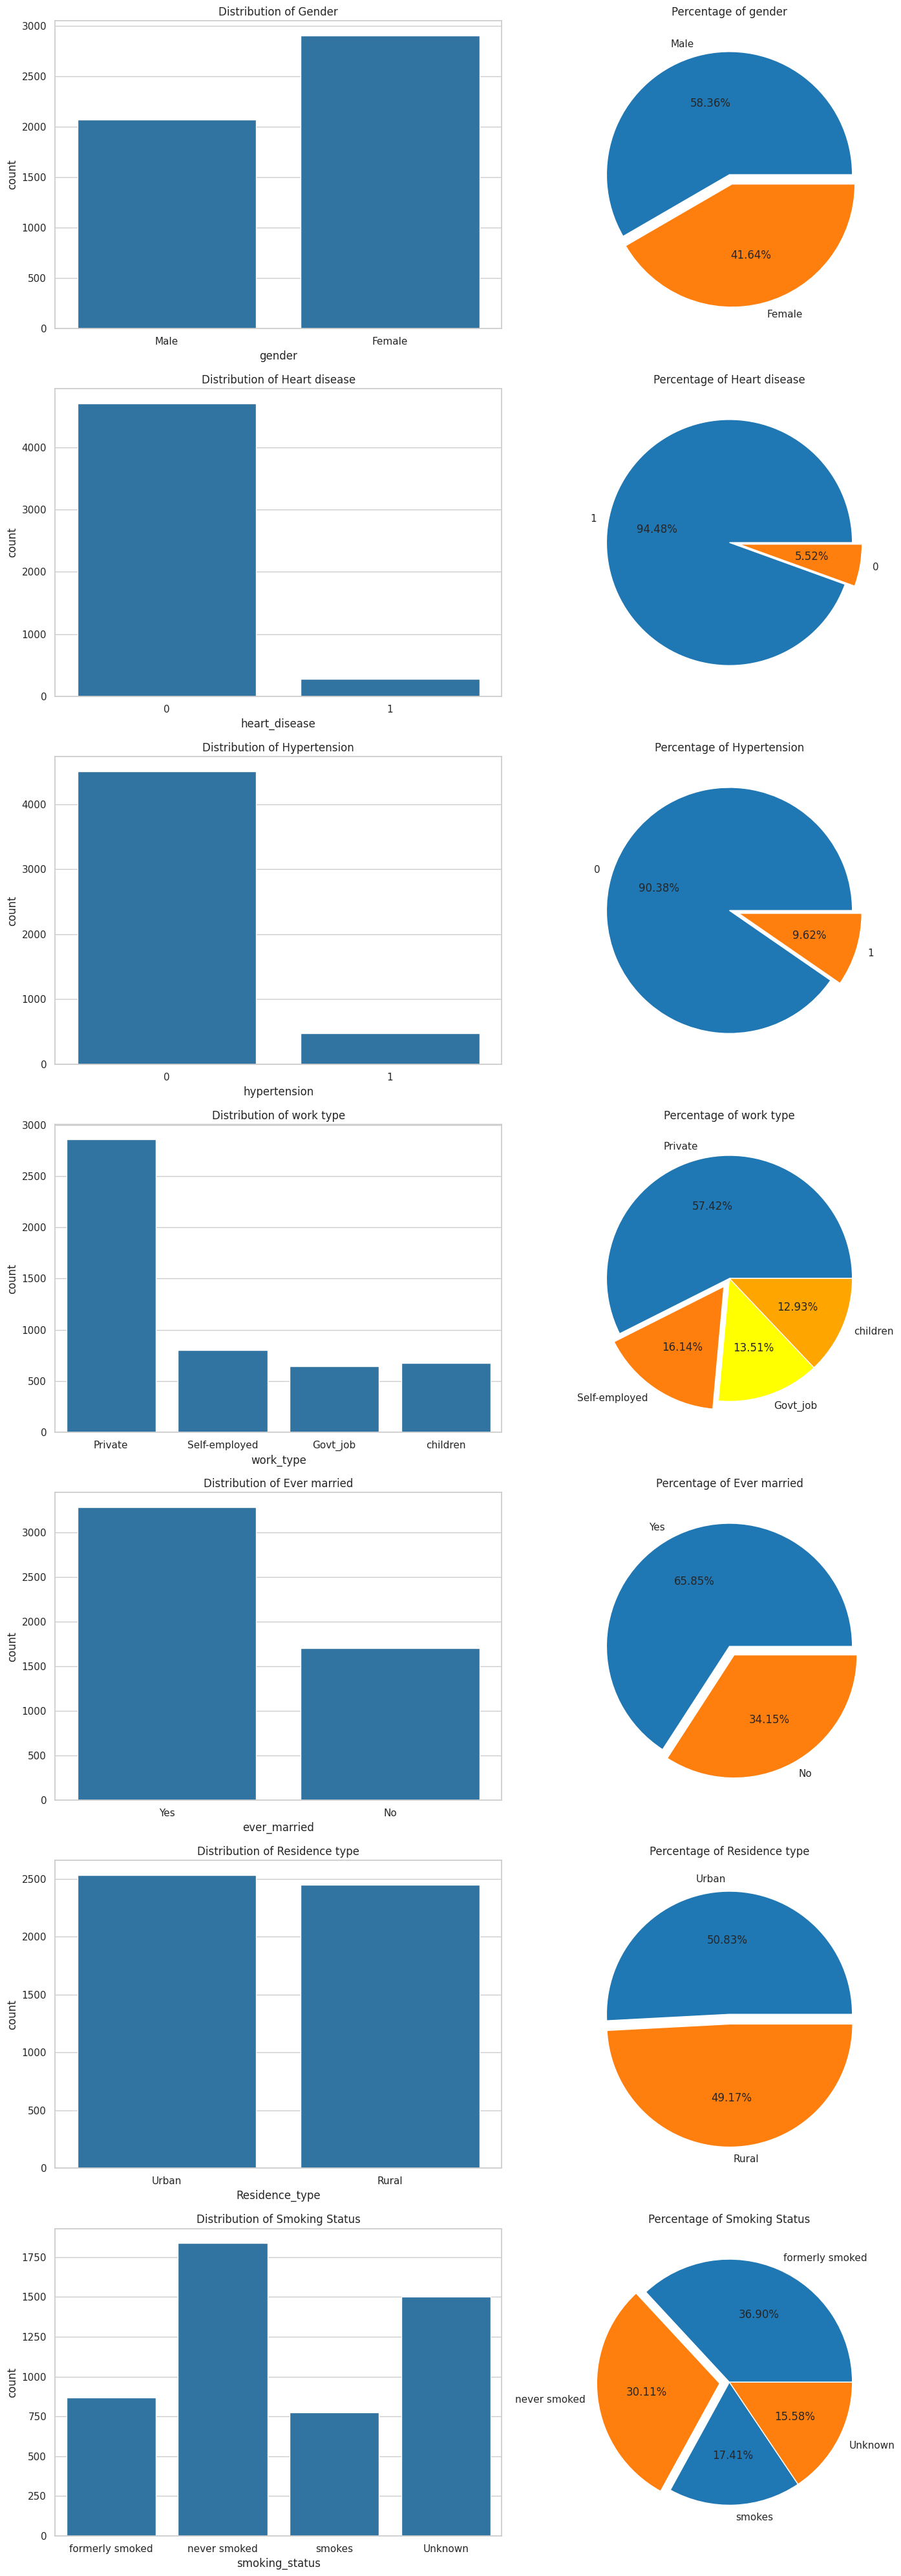

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 40))
plt.subplots_adjust(hspace=0.5)

plt.subplot(7, 2, 1)
sns.countplot(x=df['gender'], data=df, color='tab:blue')
plt.title('Distribution of Gender')

plt.subplot(7, 2, 2)
counter = df.gender.unique()
colors = ['tab:blue', 'tab:orange']
plt.pie(x=df['gender'].value_counts(), labels=counter, explode=(0, 0.08), autopct='%1.2f%%', colors=colors)
plt.title('Percentage of gender')

plt.subplot(7, 2, 3)
sns.countplot(x=df['heart_disease'], data=df, color='tab:blue')
plt.title('Distribution of Heart disease')

plt.subplot(7, 2, 4)
counter = df.heart_disease.unique()
colors = ['tab:blue', 'tab:orange']
plt.pie(x=df['heart_disease'].value_counts(), labels=counter, explode=(0, 0.08), autopct='%1.2f%%', colors=colors)
plt.title('Percentage of Heart disease')

plt.subplot(7, 2, 5)
sns.countplot(x=df['hypertension'], data=df, color='tab:blue')
plt.title('Distribution of Hypertension')

plt.subplot(7, 2, 6)
counter = df.hypertension.unique()
colors = ['tab:blue', 'tab:orange']
plt.pie(x=df['hypertension'].value_counts(), labels=counter, explode=(0, 0.08), autopct='%1.2f%%', colors=colors)
plt.title('Percentage of Hypertension')

plt.subplot(7, 2, 7)
sns.countplot(x=df['work_type'], data=df, color='tab:blue')
plt.title('Distribution of work type')

plt.subplot(7, 2, 8)
counter = df.work_type.unique()
colors = ['tab:blue', 'tab:orange', 'yellow', 'orange']
plt.pie(x=df['work_type'].value_counts(), labels=counter, explode=(0, 0.08, 0, 0), autopct='%1.2f%%', colors=colors)
plt.title('Percentage of work type')

plt.subplot(7, 2, 9)
sns.countplot(x=df['ever_married'], data=df, color='tab:blue')
plt.title('Distribution of Ever married')

plt.subplot(7, 2, 10)
counter = df.ever_married.unique()
colors = ['tab:blue', 'tab:orange']
plt.pie(x=df['ever_married'].value_counts(), labels=counter, explode=(0, 0.08), autopct='%1.2f%%', colors=colors)
plt.title('Percentage of Ever married')

plt.subplot(7, 2, 11)
sns.countplot(x=df['Residence_type'], data=df, color='tab:blue')
plt.title('Distribution of Residence type')

plt.subplot(7, 2, 12)
counter = df.Residence_type.unique()
colors = ['tab:blue', 'tab:orange']
plt.pie(x=df['Residence_type'].value_counts(), labels=counter, explode=(0, 0.08), autopct='%1.2f%%', colors=colors)
plt.title('Percentage of Residence type')

plt.subplot(7,2,13)
sns.countplot(x = df['smoking_status'], data = df, color='tab:blue')
plt.title('Distribution of Smoking Status')
plt.subplot(7,2,14)
counter = df.smoking_status.unique()
colors = ['tab:blue', 'tab:orange']
plt.pie(x= df['smoking_status'].value_counts(), labels = counter, explode = (0, 0.08, 0, 0), autopct = '%1.2f%%',colors=colors)
plt.title('Percentage of Smoking Status')


plt.tight_layout()
plt.show()


This plot shows the data-distribution of each feature set.

Interestingly, we have very less no. of people suffering from disease like hypertension and heart disease and in the dataset, we have more no. of females than males.

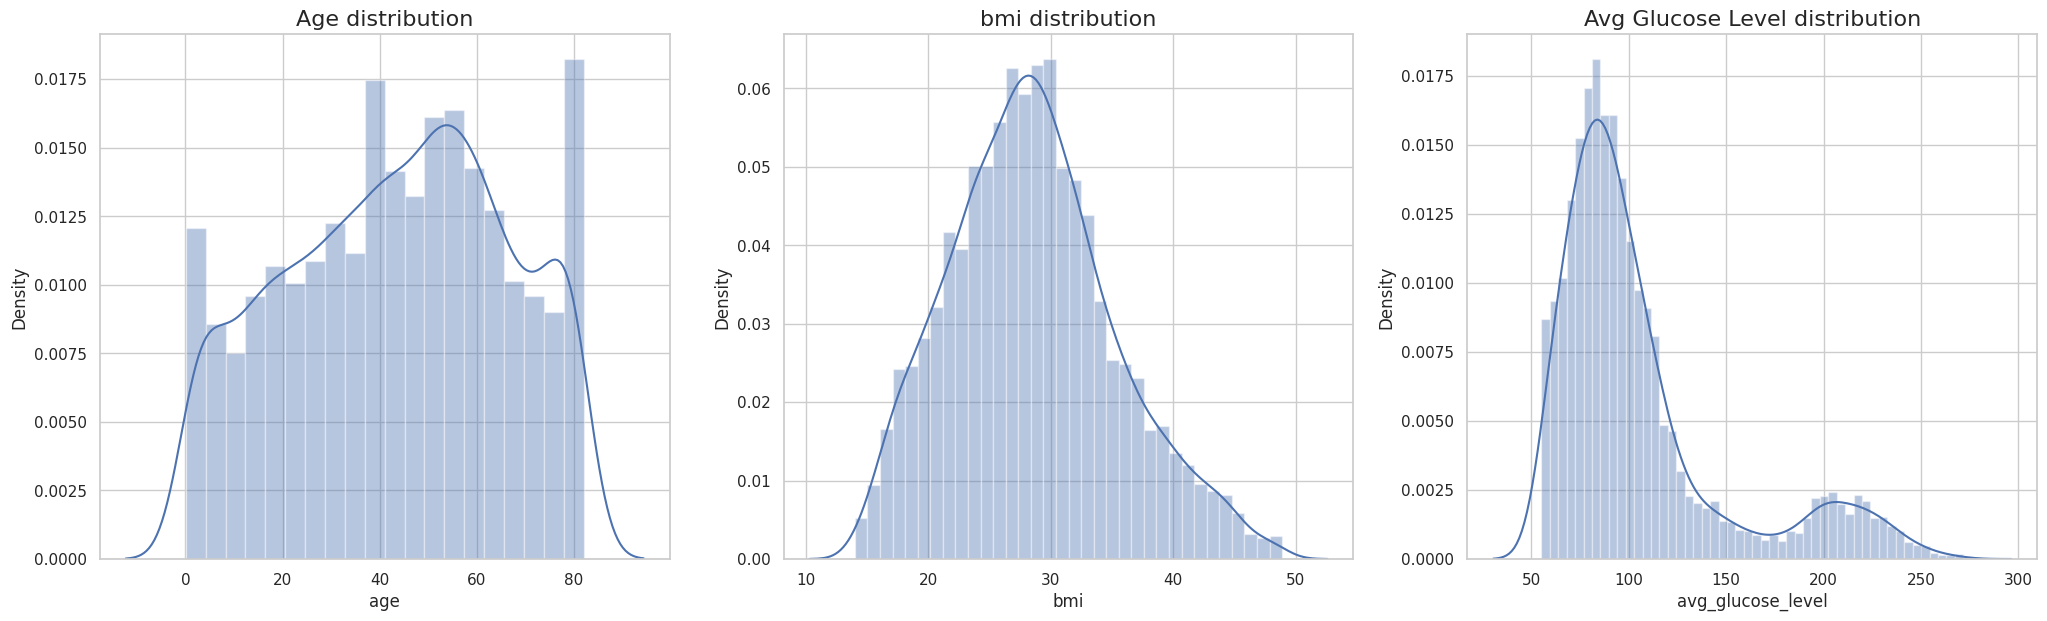

In [ ]:
plt.figure(figsize = (25, 15))
plt.subplot(2, 3, 1)
axis1 = sns.distplot(df['age'])
axis1.set_title('Age distribution', fontdict={'fontsize': 16})


plt.subplot(2, 3, 2)
axis1 = sns.distplot(df['bmi'])
axis1.set_title('bmi distribution', fontdict={'fontsize': 16})


plt.subplot(2, 3, 3)
axis = sns.distplot(df['avg_glucose_level'])
axis.set_title('Avg Glucose Level distribution', fontdict={'fontsize': 16})
plt.show()


Plotting for continuous features, we have the following inferences:

1. The age feature is broadly spread, this means we have many people of each age group.
2. BMI has a gaussian curve with most people having bmi around 25-30, which is slightly worrying (not for our calculations) as bmi>25 means overweight. This means most of the people whose data was taken in the dataset were probably overweight.

In [ ]:
from pandas_profiling import ProfileReport as PR
profile = PR(
    df,
    title="Stroke Dataset Report",
    dark_mode=False,
    progress_bar=False,
    explorative=True,
    plot={"correlation": {"cmap": "coolwarm", "bad": "#000000"}}
)

profile.to_notebook_iframe()

# Preprocessing

Finding columns which are of object type for Encoding

In [ ]:
object_cols = df.select_dtypes(include=['object']).columns
print("Columns of object type:", object_cols)

Columns of object type: Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [ ]:
for x in object_cols:
  df[x]=LE.fit_transform(df[x])

In [ ]:
df[object_cols].head()

gender  ever_married  work_type  Residence_type  smoking_status
0       1             1          1               1               1
1       1             1          1               0               2
2       0             1          1               1               3
3       0             1          2               0               2
4       1             1          1               1               1

## Splitting the data into X and Y

In [ ]:
Y=df['stroke']
X=df.drop('stroke',axis=1)
X.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          1   
1       1  80.0             0              1             1          1   
2       0  49.0             0              0             1          1   
3       0  79.0             1              0             1          2   
4       1  81.0             0              0             1          1   

   Residence_type  avg_glucose_level   bmi  smoking_status  
0               1             228.69  36.6               1  
1               0             105.92  32.5               2  
2               1             171.23  34.4               3  
3               0             174.12  24.0               2  
4               1             186.21  29.0               1

We can see that all the object-type columns are converted to integer type via label encoding.

## Splitting data into train and test set.

In [ ]:
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(X, Y, test_size= 0.3, random_state= 11,shuffle=True,stratify=Y)

In [ ]:
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()

In [ ]:
len(y_test==1)

1495

# Data Transformation

## Oversampling using SMOTE

In [ ]:
df[df['stroke']==0]

gender   age  hypertension  heart_disease  ever_married  work_type  \
208        1   3.0             0              0             0          3   
209        1  58.0             1              0             1          1   
210        0   8.0             0              0             0          1   
211        0  70.0             0              0             1          1   
212        0  52.0             0              0             1          1   
...      ...   ...           ...            ...           ...        ...   
4976       1  41.0             0              0             0          1   
4977       1  40.0             0              0             1          1   
4978       0  45.0             1              0             1          0   
4979       1  40.0             0              0             1          1   
4980       0  80.0             1              0             1          1   

      Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
208                0              95.12  18.0               0       0  
209                1              87.96  39.2               2       0  
210                1             110.89  17.6               0       0  
211                0              69.04  35.9               1       0  
212                1              77.59  17.7               1       0  
...              ...                ...   ...             ...     ...  
4976               0              70.15  29.8               1       0  
4977               1             191.15  31.1               3       0  
4978               0              95.02  31.8               3       0  
4979               0              83.94  30.0               3       0  
4980               1              83.75  29.1               2       0  

[4733 rows x 11 columns]

In [ ]:
df[df['heart_disease']==0]

gender   age  hypertension  heart_disease  ever_married  work_type  \
2          0  49.0             0              0             1          1   
3          0  79.0             1              0             1          2   
4          1  81.0             0              0             1          1   
6          0  69.0             0              0             0          1   
7          0  78.0             0              0             1          1   
...      ...   ...           ...            ...           ...        ...   
4976       1  41.0             0              0             0          1   
4977       1  40.0             0              0             1          1   
4978       0  45.0             1              0             1          0   
4979       1  40.0             0              0             1          1   
4980       0  80.0             1              0             1          1   

      Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
2                  1             171.23  34.4               3       1  
3                  0             174.12  24.0               2       1  
4                  1             186.21  29.0               1       1  
6                  1              94.39  22.8               2       1  
7                  1              58.57  24.2               0       1  
...              ...                ...   ...             ...     ...  
4976               0              70.15  29.8               1       0  
4977               1             191.15  31.1               3       0  
4978               0              95.02  31.8               3       0  
4979               0              83.94  30.0               3       0  
4980               1              83.75  29.1               2       0  

[4706 rows x 11 columns]

In [ ]:
df[df['stroke']==1]

gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          1   
1          1  80.0             0              1             1          1   
2          0  49.0             0              0             1          1   
3          0  79.0             1              0             1          2   
4          1  81.0             0              0             1          1   
...      ...   ...           ...            ...           ...        ...   
4815       1  79.0             0              0             1          1   
4816       1  74.0             0              0             1          1   
4817       0  76.0             1              1             1          2   
4818       1  74.0             0              0             1          2   
4819       1  71.0             1              0             1          2   

      Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0                  1             228.69  36.6               1       1  
1                  0             105.92  32.5               2       1  
2                  1             171.23  34.4               3       1  
3                  0             174.12  24.0               2       1  
4                  1             186.21  29.0               1       1  
...              ...                ...   ...             ...     ...  
4815               0             114.77  27.2               1       1  
4816               1             167.13  28.7               0       1  
4817               1             199.86  31.7               3       1  
4818               0              60.98  28.1               2       1  
4819               0              87.80  30.8               0       1  

[248 rows x 11 columns]

As is apparent from above, amount data for class 1 under 'stroke' is significantly less than the data for class 0

In [ ]:
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import RandomOverSampler
# from imblearn.over_sampling import ADASYN

smote_nc = SMOTENC(categorical_features=[0,2,3,4,5,6,9], random_state=0)
# smote_nc = RandomOverSampler(random_state=42)
# smote_nc = SMOTE( random_state=0)
# smote_nc=ADASYN(random_state=0)
X_resampled, Y_resampled = smote_nc.fit_resample(x_train, y_train)
SMOTE_df=pd.DataFrame(np.c_[X_resampled,Y_resampled],columns=df.columns)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7fcb6c67add0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 584, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 725, in _make_controller_from_path
    lib_controller = lib_controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 842, in __init__
    super().__init__(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 810, in __init__
    self._dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


In [ ]:
SMOTE_df[SMOTE_df['stroke']==0]

gender    age  hypertension  heart_disease  ever_married  work_type  \
0        0.0  43.00           0.0            0.0           1.0        1.0   
1        0.0  57.00           0.0            0.0           1.0        1.0   
2        1.0  73.00           0.0            0.0           1.0        1.0   
3        1.0  82.00           0.0            0.0           1.0        2.0   
4        0.0  32.00           0.0            0.0           1.0        1.0   
...      ...    ...           ...            ...           ...        ...   
3481     0.0   2.00           0.0            0.0           0.0        3.0   
3482     1.0  14.00           0.0            0.0           0.0        1.0   
3483     0.0  26.00           0.0            0.0           1.0        1.0   
3484     0.0   0.64           0.0            0.0           0.0        3.0   
3485     1.0   5.00           0.0            0.0           0.0        3.0   

      Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0                1.0              57.79  24.8             3.0     0.0  
1                1.0             217.40  36.6             2.0     0.0  
2                0.0              86.57  28.5             1.0     0.0  
3                0.0              56.75  21.0             2.0     0.0  
4                1.0              98.09  25.2             3.0     0.0  
...              ...                ...   ...             ...     ...  
3481             0.0              92.48  18.0             0.0     0.0  
3482             0.0             108.65  23.1             2.0     0.0  
3483             0.0              88.79  24.9             2.0     0.0  
3484             1.0              83.82  24.9             0.0     0.0  
3485             0.0             100.98  19.0             0.0     0.0  

[3312 rows x 11 columns]

In [ ]:
SMOTE_df[SMOTE_df['stroke']==1]

gender        age  hypertension  heart_disease  ever_married  work_type  \
6        0.0  72.000000           0.0            0.0           1.0        1.0   
13       0.0  68.000000           1.0            1.0           1.0        1.0   
51       0.0  79.000000           0.0            0.0           1.0        1.0   
53       0.0  68.000000           1.0            0.0           1.0        2.0   
56       1.0  74.000000           1.0            1.0           1.0        1.0   
...      ...        ...           ...            ...           ...        ...   
6619     0.0  63.604272           0.0            0.0           1.0        1.0   
6620     1.0  60.519371           0.0            0.0           1.0        1.0   
6621     0.0  80.897278           0.0            0.0           1.0        1.0   
6622     0.0  74.535401           0.0            0.0           1.0        2.0   
6623     1.0  72.000000           0.0            0.0           1.0        1.0   

      Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
6                1.0         219.910000  32.100000             0.0     1.0  
13               1.0         247.510000  40.500000             1.0     1.0  
51               0.0          93.050000  24.200000             2.0     1.0  
53               0.0         206.090000  26.700000             2.0     1.0  
56               0.0          70.090000  27.400000             2.0     1.0  
...              ...                ...        ...             ...     ...  
6619             1.0         104.888038  25.199185             1.0     1.0  
6620             1.0         207.844531  43.311623             2.0     1.0  
6621             0.0          80.793585  23.441089             2.0     1.0  
6622             1.0          74.388906  26.564307             2.0     1.0  
6623             1.0         220.429741  31.519438             0.0     1.0  

[3312 rows x 11 columns]

## Feature Selection

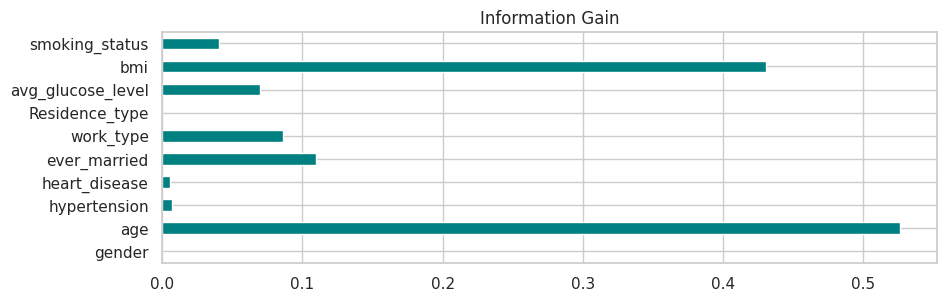

In [ ]:
from sklearn.feature_selection import mutual_info_classif
plt.rcParams["figure.figsize"] = (10,3)
ranking=mutual_info_classif(SMOTE_df.drop('stroke',axis=1),SMOTE_df['stroke'])
df_rank=pd.Series(ranking,SMOTE_df.columns[:-1])
df_rank.plot(kind='barh',color='teal')
plt.title('Information Gain')
plt.show()

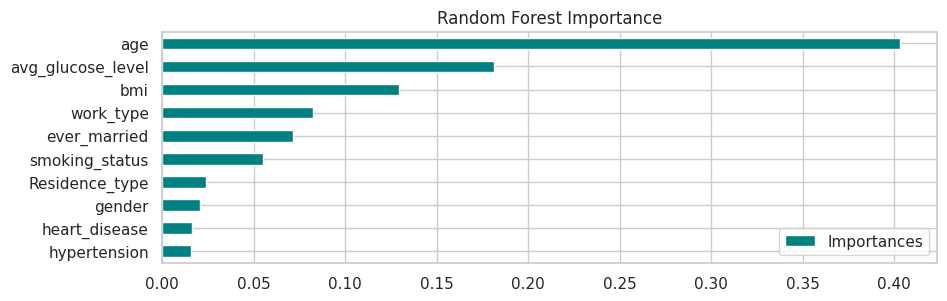

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=340)

model.fit(SMOTE_df.drop('stroke',axis=1),SMOTE_df['stroke'])

importances = model.feature_importances_

final_df = pd.DataFrame({ "Features": pd.DataFrame(SMOTE_df.drop('stroke',axis=1)).columns,"Importances":importances})
final_df.set_index("Importances")


final_df=final_df.sort_values('Importances')

final_df.set_index('Features', inplace=True)
final_df.plot(kind='barh', color='teal')
ax = plt.gca()
ax.set_ylabel('')
plt.title('Random Forest Importance')
plt.show()



With reference to the above two plots, we select the following feature set:

{age,avg_glucose_level,bmi,work_type,smoking_status,ever_married}

In [ ]:
df_selected=SMOTE_df[["age","avg_glucose_level","bmi","work_type","smoking_status","ever_married",'stroke']]
X_resampled,Y_resampled=df_selected[["age","avg_glucose_level","bmi","work_type","smoking_status","ever_married"]],df_selected[['stroke']]
x_test=x_test[["age","avg_glucose_level","bmi","work_type","smoking_status","ever_married"]]

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled= sc.fit_transform(X_resampled)
X_scaled_test= sc.fit_transform(x_test)
xsc=sc.fit_transform(x_train)
X_scaled.shape

(6624, 6)

It scaled the dataset and also changed the dataframe to numpy array.

In [ ]:
if isinstance(Y, pd.Series):
    Y = Y.to_numpy()
Y

array([1, 1, 1, ..., 0, 0, 0])

This changes the series Y to a numpy array to keep both X and Y as numpy arrays.

## PCA Transform

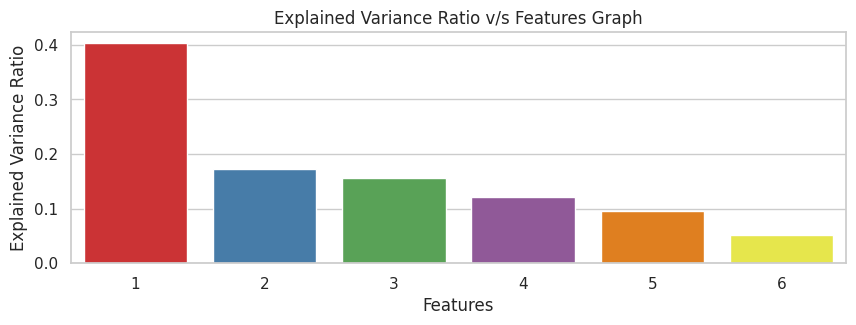

In [ ]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components = 6)
pca_model.fit(X_scaled)
eigenvalue = pca_model.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(eigenvalue)

comps=np.arange(0,len(eigenvalue),1)

# plt.subplot(1, 2, 1)
sns.barplot(x=comps+1, y=eigenvalue, palette='Set1')
sns.set_style('whitegrid')
plt.title('Explained Variance Ratio v/s Features Graph')
plt.xlabel('Features')
plt.ylabel('Explained Variance Ratio')
plt.show()

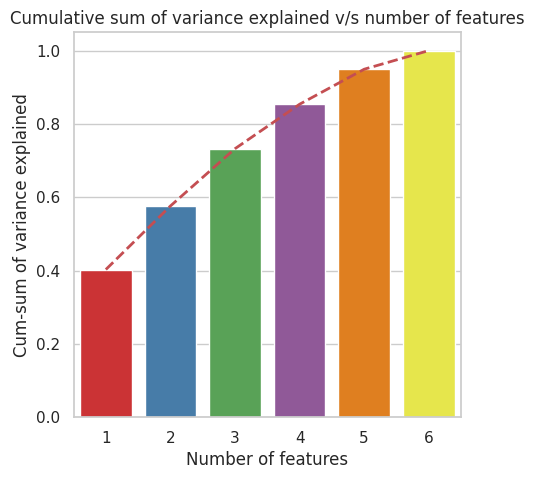

In [ ]:
# plt.subplot(1, 2, 2)
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(comps, cum_sum_eigenvalues, 'r--', linewidth=2)
sns.barplot(x=comps+1, y=cum_sum_eigenvalues, palette='Set1')
plt.title('Cumulative sum of variance explained v/s number of features')
plt.xlabel('Number of features')
plt.ylabel('Cum-sum of variance explained')
plt.show()

In [ ]:
cum_sum_eigenvalues[4]

0.9491770506428729

Explained variance for n_features=5 is 94.91%

In [ ]:
pca_model = PCA(n_components = 5)
PCA_X = pca_model.fit_transform(X_scaled)
PCA_X_test = pca_model.fit_transform(x_test)

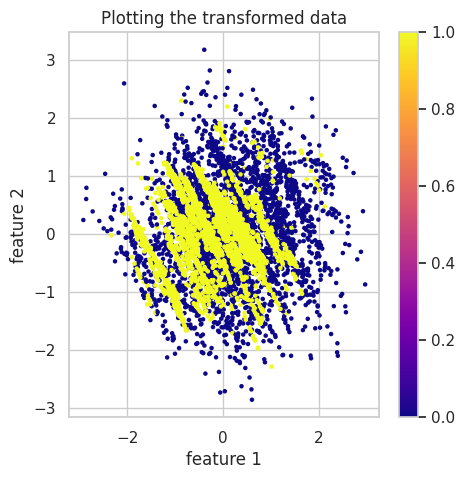

In [ ]:
plt.rcParams["figure.figsize"] = (5,5)
plt.scatter(PCA_X[:, 3], PCA_X[:, 4], c=Y_resampled.to_numpy(), s=5, cmap='plasma')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Plotting the transformed data')
plt.colorbar()
plt.show()

## LDA Transform

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model=LinearDiscriminantAnalysis()
# lda_model.fit(X,Y)
LDA_X = lda_model.fit_transform(X_resampled,Y_resampled)
LDA_X_test = lda_model.fit_transform(x_test,y_test)

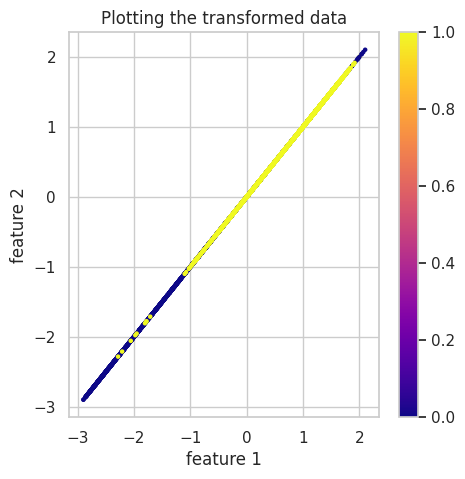

In [ ]:
plt.rcParams["figure.figsize"] = (5,5)
plt.scatter(LDA_X[:, 0], LDA_X[:, 0], c=Y_resampled.to_numpy(), s=5, cmap='plasma')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Plotting the transformed data')
plt.colorbar()
plt.show()

In [ ]:
# clf=RandomForestClassifier(criterion='gini',max_depth=8)
clf=DecisionTreeClassifier(criterion='gini',max_depth=5)
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
clf.fit(LDA_X,Y_resampled)
y_pred=clf.predict(LDA_X_test)
# y_pred = cross_val_predict(clf, LDA_X_test, y_test, cv=5)
conf_mat = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.57      0.72      1421
           1       0.07      0.64      0.13        74

    accuracy                           0.58      1495
   macro avg       0.52      0.60      0.42      1495
weighted avg       0.92      0.58      0.69      1495



In [ ]:
conf_mat

array([[813, 608],
       [ 27,  47]])

## t-SNE

In [ ]:
from sklearn.manifold import TSNE
from scipy.spatial.distance import pdist, squareform
tsne_model = TSNE(n_components=3)
tsne_X = tsne_model.fit_transform(X_resampled)
tsne_X_test = tsne_model.fit_transform(x_test)
varience_explained = np.sum(tsne_model.kl_divergence_) / np.prod(tsne_X.shape)
print(varience_explained)
distances = squareform(pdist(tsne_X))
embedding_var = np.var(distances)

2.7464462771123925e-05


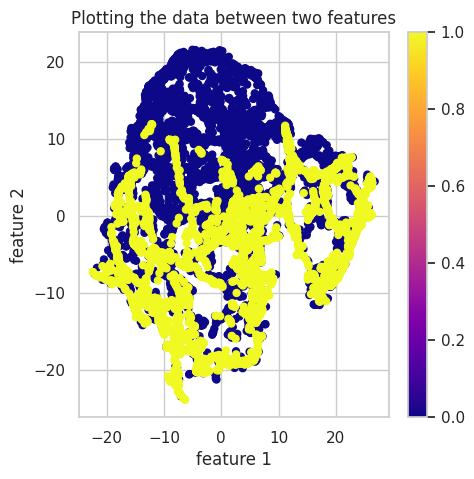

In [ ]:
plt.scatter(tsne_X[:,0],tsne_X[:,1], c=Y_resampled.to_numpy(), s=25, cmap='plasma')
plt.title('Plotting the data between two features')
plt.xlabel('feature 1')
plt.colorbar()
plt.ylabel('feature 2')
plt.show()

# Model Training and testing

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression

## 1. DTC

In [ ]:
# Using grid search to find the best hyperparameters
dtc=DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10,15,17,20,22,23,25,27,30,34,37,40],
    'min_samples_split': [1,4, 6, 8, 10]
}


grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5)
grid_search.fit(X_resampled, Y_resampled)
print("Best hyperparameters:", grid_search.best_params_)

best_dtc = DecisionTreeClassifier(criterion=grid_search.best_params_['criterion'],max_depth=grid_search.best_params_['max_depth'], min_samples_split=grid_search.best_params_['min_samples_split'])
best_dtc.fit(X_resampled, Y_resampled)

y_pred_best_params = best_dtc.predict(x_test)


Best hyperparameters: {'criterion': 'entropy', 'max_depth': 37, 'min_samples_split': 8}


In [ ]:
#@title LDA dataset

dtc=DecisionTreeClassifier(criterion='gini',max_depth=30,min_samples_split=4)
dtc.fit(LDA_X,Y_resampled)
bpr=dtc.predict(LDA_X_test)
conf_mat = confusion_matrix(y_test, bpr)
print(classification_report(y_test, bpr),'\n')
print(conf_mat)

              precision    recall  f1-score   support

           0       0.96      0.63      0.76      1421
           1       0.06      0.43      0.10        74

    accuracy                           0.62      1495
   macro avg       0.51      0.53      0.43      1495
weighted avg       0.91      0.62      0.73      1495
 

[[898 523]
 [ 42  32]]


In [ ]:
#@title PCA dataset

dtc=DecisionTreeClassifier(criterion='gini',max_depth=15,min_samples_split=4)
dtc.fit(PCA_X,Y_resampled)
bpr=dtc.predict(PCA_X_test)
conf_mat = confusion_matrix(y_test, bpr)
print(classification_report(y_test, bpr),'\n')
print(conf_mat)

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      1421
           1       0.03      0.07      0.04        74

    accuracy                           0.86      1495
   macro avg       0.49      0.48      0.48      1495
weighted avg       0.90      0.86      0.88      1495
 

[[1275  146]
 [  69    5]]


In [ ]:
#@title tsne dataset

dtc=DecisionTreeClassifier()
dtc.fit(tsne_X,Y_resampled)
bpr=dtc.predict(tsne_X_test)
conf_mat = confusion_matrix(y_test, bpr)
print(classification_report(y_test, bpr),'\n')
print(conf_mat)

              precision    recall  f1-score   support

           0       0.97      0.70      0.81      1421
           1       0.08      0.53      0.14        74

    accuracy                           0.69      1495
   macro avg       0.52      0.61      0.48      1495
weighted avg       0.92      0.69      0.78      1495
 

[[995 426]
 [ 35  39]]


In [ ]:
#@title untransformed dataset

dtc=DecisionTreeClassifier(criterion='entropy',max_depth=37,min_samples_split=8)
dtc.fit(X_resampled,Y_resampled)
bpr=dtc.predict(x_test)
conf_mat = confusion_matrix(y_test, bpr)
print(classification_report(y_test, bpr),'\n')
print(conf_mat)

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1421
           1       0.14      0.36      0.21        74

    accuracy                           0.86      1495
   macro avg       0.55      0.63      0.57      1495
weighted avg       0.92      0.86      0.89      1495
 

[[1261  160]
 [  47   27]]


## 2. Bagging classifier

In [ ]:
#@title tsne dataset
estimators = [('xgb', XGBClassifier()),
              ('lr', LogisticRegression())]

ensemble = VotingClassifier(estimators)

bagging_model = BaggingClassifier(base_estimator=ensemble, n_estimators=50, random_state=42)

bagging_model.fit(tsne_X,Y_resampled)
bpr=bagging_model.predict(tsne_X_test)
conf_mat = confusion_matrix(y_test, bpr)
print(classification_report(y_test, bpr),'\n')
print(conf_mat)

              precision    recall  f1-score   support

           0       0.98      0.74      0.84      1421
           1       0.13      0.76      0.22        74

    accuracy                           0.74      1495
   macro avg       0.56      0.75      0.53      1495
weighted avg       0.94      0.74      0.81      1495
 

[[1046  375]
 [  18   56]]


In [ ]:
estimators = [('svm',SVC(kernel='sigmoid',C=3)),
              ('xgb', XGBClassifier()),
              ('lr', LogisticRegression())]

ensemble = VotingClassifier(estimators)

bagging_model = BaggingClassifier(base_estimator=ensemble, n_estimators=50, random_state=42)

bagging_model.fit(tsne_X,Y_resampled)
bpr=bagging_model.predict(tsne_X_test)
conf_mat = confusion_matrix(y_test, bpr)
print(classification_report(y_test, bpr),'\n')
print(conf_mat)

              precision    recall  f1-score   support

           0       0.99      0.55      0.71      1421
           1       0.10      0.95      0.18        74

    accuracy                           0.57      1495
   macro avg       0.55      0.75      0.45      1495
weighted avg       0.95      0.57      0.68      1495
 

[[786 635]
 [  4  70]]


In [ ]:
#@title LDA dataset
estimators = [('svm',SVC(kernel='sigmoid',C=3)),
              ('xgb', XGBClassifier()),
              ('lr', LogisticRegression())]

ensemble = VotingClassifier(estimators)

bagging_model = BaggingClassifier(base_estimator=ensemble, n_estimators=50, random_state=42)

bagging_model.fit(LDA_X,Y_resampled)
bpr=bagging_model.predict(LDA_X_test)
conf_mat = confusion_matrix(y_test, bpr)
print(classification_report(y_test, bpr),'\n')
print(conf_mat)

              precision    recall  f1-score   support

           0       0.97      0.68      0.80      1421
           1       0.09      0.59      0.15        74

    accuracy                           0.68      1495
   macro avg       0.53      0.64      0.48      1495
weighted avg       0.93      0.68      0.77      1495
 

[[969 452]
 [ 30  44]]


In [ ]:
#@title PCA dataset
estimators = [('svm',SVC(kernel='sigmoid',C=3)),
              ('xgb', XGBClassifier()),
              ('lr', LogisticRegression())]

ensemble = VotingClassifier(estimators)

bagging_model = BaggingClassifier(base_estimator=ensemble, n_estimators=50, random_state=42)

bagging_model.fit(PCA_X,Y_resampled)
bpr=bagging_model.predict(PCA_X_test)
conf_mat = confusion_matrix(y_test, bpr)
print(classification_report(y_test, bpr),'\n')
print(conf_mat)

              precision    recall  f1-score   support

           0       0.95      0.70      0.81      1421
           1       0.05      0.30      0.08        74

    accuracy                           0.68      1495
   macro avg       0.50      0.50      0.45      1495
weighted avg       0.91      0.68      0.77      1495
 

[[996 425]
 [ 52  22]]


In [ ]:
#@title untransformed data
estimators = [('svm',SVC(kernel='sigmoid',C=3)),
              ('xgb', XGBClassifier()),
              ('lr', LogisticRegression())]

ensemble = VotingClassifier(estimators)

bagging_model = BaggingClassifier(base_estimator=ensemble, n_estimators=50, random_state=42)

bagging_model.fit(SMOTE_df[['age','ever_married','work_type','bmi','avg_glucose_level']],SMOTE_df['stroke'])
bpr=bagging_model.predict(x_test[['age','ever_married','work_type','bmi','avg_glucose_level']])
conf_mat = confusion_matrix(y_test, bpr)
print(classification_report(y_test, bpr),'\n')
print(conf_mat)

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      1421
           1       0.11      0.38      0.17        74

    accuracy                           0.82      1495
   macro avg       0.54      0.61      0.53      1495
weighted avg       0.92      0.82      0.86      1495
 

[[1192  229]
 [  46   28]]


## 3. Random Forest classifier

In [ ]:
#@title LDA dataset

dtc=RandomForestClassifier(criterion='log_loss')
dtc.fit(LDA_X,Y_resampled)
bpr=dtc.predict(LDA_X_test)
conf_mat = confusion_matrix(y_test, bpr)
print(classification_report(y_test, bpr),'\n')
print(conf_mat)

              precision    recall  f1-score   support

           0       0.96      0.65      0.78      1421
           1       0.07      0.49      0.12        74

    accuracy                           0.64      1495
   macro avg       0.51      0.57      0.45      1495
weighted avg       0.92      0.64      0.74      1495
 

[[926 495]
 [ 38  36]]


In [ ]:
#@title tsne dataset

dtc=RandomForestClassifier(criterion='log_loss')
dtc.fit(tsne_X,Y_resampled)
bpr=dtc.predict(tsne_X_test)
conf_mat = confusion_matrix(y_test, bpr)
print(classification_report(y_test, bpr),'\n')
print(conf_mat)

              precision    recall  f1-score   support

           0       0.97      0.75      0.84      1421
           1       0.10      0.54      0.17        74

    accuracy                           0.74      1495
   macro avg       0.53      0.64      0.51      1495
weighted avg       0.93      0.74      0.81      1495
 

[[1064  357]
 [  34   40]]


In [ ]:
#@title untransformed dataset

dtc=RandomForestClassifier(criterion='log_loss',max_depth=9)
dtc.fit(X_resampled,Y_resampled)#
bpr=dtc.predict(x_test)
conf_mat = confusion_matrix(y_test, bpr)
print(classification_report(y_test, bpr),'\n')
print(conf_mat)

              precision    recall  f1-score   support

           0       0.97      0.78      0.87      1421
           1       0.13      0.61      0.21        74

    accuracy                           0.77      1495
   macro avg       0.55      0.69      0.54      1495
weighted avg       0.93      0.77      0.84      1495
 

[[1111  310]
 [  29   45]]


In [ ]:
#@title PCA dataset

dtc=RandomForestClassifier()
dtc.fit(PCA_X,Y_resampled)
bpr=dtc.predict(PCA_X_test)
conf_mat = confusion_matrix(y_test, bpr)
print(classification_report(y_test, bpr),'\n')
print(conf_mat)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1421
           1       0.00      0.00      0.00        74

    accuracy                           0.93      1495
   macro avg       0.47      0.49      0.48      1495
weighted avg       0.90      0.93      0.91      1495
 

[[1383   38]
 [  74    0]]


## 4. Logistic Regression

In [ ]:
#@title tsne dataset


clf = LogisticRegression(random_state=42).fit(tsne_X, Y_resampled)
lpr=clf.predict(tsne_X_test)
conf_mat = confusion_matrix(y_test, lpr)
print(classification_report(y_test, lpr),'\n')
print(conf_mat)

              precision    recall  f1-score   support

           0       1.00      0.48      0.65      1421
           1       0.09      0.97      0.16        74

    accuracy                           0.51      1495
   macro avg       0.54      0.73      0.41      1495
weighted avg       0.95      0.51      0.63      1495
 

[[685 736]
 [  2  72]]


In [ ]:
#@title untransformed data
clf = LogisticRegression().fit(X_resampled
, Y_resampled)
lpr=clf.predict(x_test)#
conf_mat = confusion_matrix(y_test, lpr)
print(classification_report(y_test, lpr),'\n')
print(conf_mat)

              precision    recall  f1-score   support

           0       0.99      0.69      0.81      1421
           1       0.12      0.82      0.21        74

    accuracy                           0.70      1495
   macro avg       0.55      0.76      0.51      1495
weighted avg       0.94      0.70      0.78      1495
 

[[983 438]
 [ 13  61]]


In [ ]:
#@title PCA data
clf = LogisticRegression(random_state=42).fit(PCA_X, Y_resampled)
ppr=clf.predict(PCA_X_test)
conf_mat = confusion_matrix(y_test, ppr)
print(classification_report(y_test, ppr),'\n')
print(conf_mat)

              precision    recall  f1-score   support

           0       0.99      0.53      0.69      1421
           1       0.09      0.95      0.17        74

    accuracy                           0.55      1495
   macro avg       0.54      0.74      0.43      1495
weighted avg       0.95      0.55      0.66      1495
 

[[747 674]
 [  4  70]]


In [ ]:
#@title LDA data
clf = LogisticRegression(random_state=42).fit(LDA_X, Y_resampled)
dpr=clf.predict(LDA_X_test)
conf_mat = confusion_matrix(y_test, dpr)
print(classification_report(y_test, dpr),'\n')
print(conf_mat)

              precision    recall  f1-score   support

           0       0.99      0.63      0.77      1421
           1       0.11      0.89      0.20        74

    accuracy                           0.65      1495
   macro avg       0.55      0.76      0.49      1495
weighted avg       0.95      0.65      0.75      1495
 

[[901 520]
 [  8  66]]


## 5. XGB classifier

In [ ]:
#@title LDA dataset
clf=XGBClassifier(colsample_bytree= 0.3,learning_rate= 0.1, max_depth= 5, n_estimators= 100, subsample= 1.0)
clf.fit(LDA_X,Y_resampled)
y_pred=clf.predict(LDA_X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(conf_mat)

              precision    recall  f1-score   support

           0       0.97      0.58      0.73      1421
           1       0.07      0.62      0.13        74

    accuracy                           0.58      1495
   macro avg       0.52      0.60      0.43      1495
weighted avg       0.92      0.58      0.70      1495

[[824 597]
 [ 28  46]]


In [ ]:
#@title tsne dataset
clf=XGBClassifier(colsample_bytree= 0.8,learning_rate= 0.1, max_depth= 10, n_estimators= 100, subsample= 0.8)
clf.fit(tsne_X,Y_resampled)
y_pred=clf.predict(tsne_X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(conf_mat)#

              precision    recall  f1-score   support

           0       0.96      0.78      0.86      1421
           1       0.09      0.45      0.16        74

    accuracy                           0.76      1495
   macro avg       0.53      0.61      0.51      1495
weighted avg       0.92      0.76      0.83      1495

[[1104  317]
 [  41   33]]


In [ ]:
#@title untransformed dataset
clf=XGBClassifier(colsample_bytree= 0.8,learning_rate= 0.1, max_depth= 5, n_estimators= 150, subsample= 0.8)
clf.fit(X_resampled,Y_resampled)
y_pred=clf.predict(x_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(conf_mat)

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1421
           1       0.14      0.32      0.20        74

    accuracy                           0.87      1495
   macro avg       0.55      0.61      0.56      1495
weighted avg       0.92      0.87      0.89      1495

[[1277  144]
 [  50   24]]


In [ ]:
#@title PCA dataset
clf=XGBClassifier(colsample_bytree= 0.8,learning_rate= 0.1, max_depth= 5, n_estimators= 150, subsample= 0.8)
clf.fit(PCA_X,Y_resampled)
y_pred=clf.predict(PCA_X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(conf_mat)

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      1421
           1       0.00      0.00      0.00        74

    accuracy                           0.86      1495
   macro avg       0.47      0.45      0.46      1495
weighted avg       0.90      0.86      0.88      1495

[[1285  136]
 [  74    0]]


## 6. Naive Bayes classifier

In [ ]:
#@title tsne dataset
clf = GaussianNB(var_smoothing=9.111627561154887e-05)
clf.fit(tsne_X,Y_resampled)
lpr=clf.predict(tsne_X_test)
conf_mat = confusion_matrix(y_test, lpr)#
print(classification_report(y_test, lpr),'\n')
print(conf_mat)

              precision    recall  f1-score   support

           0       0.99      0.61      0.76      1421
           1       0.11      0.93      0.20        74

    accuracy                           0.63      1495
   macro avg       0.55      0.77      0.48      1495
weighted avg       0.95      0.63      0.73      1495
 

[[868 553]
 [  5  69]]


In [ ]:
#@title LDA dataset
clf = GaussianNB(var_smoothing=0.001)
clf.fit(LDA_X,Y_resampled)
lpr=clf.predict(LDA_X_test)
conf_mat = confusion_matrix(y_test, lpr)
print(classification_report(y_test, lpr),'\n')
print(conf_mat)

              precision    recall  f1-score   support

           0       0.99      0.57      0.72      1421
           1       0.10      0.88      0.17        74

    accuracy                           0.58      1495
   macro avg       0.54      0.72      0.45      1495
weighted avg       0.94      0.58      0.69      1495
 

[[804 617]
 [  9  65]]


In [ ]:
#@title PCA dataset
clf = GaussianNB(var_smoothing=0.05)
clf.fit(PCA_X,Y_resampled)
lpr=clf.predict(PCA_X_test)
conf_mat = confusion_matrix(y_test, lpr)
print(classification_report(y_test, lpr),'\n')
print(conf_mat)

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      1421
           1       0.05      0.14      0.08        74

    accuracy                           0.84      1495
   macro avg       0.50      0.50      0.49      1495
weighted avg       0.91      0.84      0.87      1495
 

[[1243  178]
 [  64   10]]


In [ ]:
#@title untransformed dataset
clf = GaussianNB(var_smoothing=0.1)
clf.fit(tsne_X,Y_resampled)
lpr=clf.predict(tsne_X_test)
conf_mat = confusion_matrix(y_test, lpr)
print(classification_report(y_test, lpr),'\n')
print(conf_mat)

              precision    recall  f1-score   support

           0       0.99      0.60      0.75      1421
           1       0.11      0.93      0.20        74

    accuracy                           0.62      1495
   macro avg       0.55      0.77      0.47      1495
weighted avg       0.95      0.62      0.72      1495
 

[[859 562]
 [  5  69]]


## 7. SVM classifier with various kernels

In [ ]:
#@title tsne data

clf=SVC(kernel='rbf',C=1.5)
clf.fit(tsne_X,Y_resampled)
spr=clf.predict(tsne_X_test)
conf_mat = confusion_matrix(y_test, spr)
print(classification_report(y_test, spr),'\n')
print(conf_mat)

              precision    recall  f1-score   support

           0       1.00      0.51      0.68      1421
           1       0.09      0.96      0.17        74

    accuracy                           0.54      1495
   macro avg       0.54      0.74      0.42      1495
weighted avg       0.95      0.54      0.65      1495
 

[[729 692]
 [  3  71]]


In [ ]:
#@title PCA data

clf=SVC(kernel='sigmoid',C=2)
clf.fit(PCA_X,Y_resampled)
spr=clf.predict(PCA_X_test)
conf_mat = confusion_matrix(y_test, spr)
print(classification_report(y_test, spr),'\n')
print(conf_mat)

              precision    recall  f1-score   support

           0       0.99      0.61      0.75      1421
           1       0.10      0.85      0.18        74

    accuracy                           0.62      1495
   macro avg       0.54      0.73      0.47      1495
weighted avg       0.94      0.62      0.72      1495
 

[[864 557]
 [ 11  63]]


In [ ]:
#@title untransformed data
#
clf=SVC(kernel='rbf',C=2)
clf.fit(X_resampled,Y_resampled)
spr=clf.predict(x_test)
conf_mat = confusion_matrix(y_test, spr)
print(classification_report(y_test, spr),'\n')
print(conf_mat)

              precision    recall  f1-score   support

           0       0.99      0.65      0.79      1421
           1       0.12      0.92      0.21        74

    accuracy                           0.66      1495
   macro avg       0.56      0.79      0.50      1495
weighted avg       0.95      0.66      0.76      1495
 

[[926 495]
 [  6  68]]


In [ ]:
#@title tsne data

clf=SVC(kernel='poly',C=5,degree=5,decision_function_shape='ovo')
clf.fit(tsne_X,Y_resampled)
spr=clf.predict(tsne_X_test)
conf_mat = confusion_matrix(y_test, spr)
print(classification_report(y_test, spr),'\n')
print(conf_mat)

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1421
           1       0.17      0.42      0.24        74

    accuracy                           0.87      1495
   macro avg       0.57      0.66      0.59      1495
weighted avg       0.93      0.87      0.90      1495
 

[[1270  151]
 [  43   31]]


In [ ]:
#@title LDA data
clf=SVC(kernel='rbf',C=2)
clf.fit(LDA_X,Y_resampled)
spr=clf.predict(LDA_X_test)
conf_mat = confusion_matrix(y_test, spr)
print(classification_report(y_test, spr),'\n')
print(conf_mat)

              precision    recall  f1-score   support

           0       0.99      0.56      0.72      1421
           1       0.10      0.93      0.18        74

    accuracy                           0.58      1495
   macro avg       0.55      0.75      0.45      1495
weighted avg       0.95      0.58      0.69      1495
 

[[794 627]
 [  5  69]]


# Neural Network

\We have made a neural network with input layer of 100 neurons, hidden layer of 100 neurons, 20 neurons and output layer of 1 neuron.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.utils import losses_utils
from tensorflow.keras.layers import Dense

In [ ]:
loss_fn=tf.keras.losses.BinaryFocalCrossentropy(
    apply_class_balancing=True,
    alpha=0.15,
    gamma=3.0,
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction=losses_utils.ReductionV2.AUTO,
    name='binary_focal_crossentropy'
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(Dense(100, input_dim = tsne_X.shape[1], activation="relu"))
model.add(Dense(100, activation="tanh"))
model.add(Dense(20,activation="tanh"))
model.add(Dense(1, activation="tanh"))

model.compile(loss=loss_fn, optimizer="adam", metrics=["accuracy"])

In [ ]:
# define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=7)

# train the model with early stopping
history = model.fit(tsne_X, Y_resampled, validation_data=(tsne_X_test, y_test), epochs=500, batch_size=64,callbacks=[early_stop] )

Epoch 1/500
104/104 [==============================] - 3s 9ms/step - loss: 0.1343 - accuracy: 0.6158 - val_loss: 0.0389 - val_accuracy: 0.8221
Epoch 2/500
104/104 [==============================] - 1s 7ms/step - loss: 0.0210 - accuracy: 0.6137 - val_loss: 0.0260 - val_accuracy: 0.9164
Epoch 3/500
104/104 [==============================] - 1s 6ms/step - loss: 0.0198 - accuracy: 0.6194 - val_loss: 0.0230 - val_accuracy: 0.9224
Epoch 4/500
104/104 [==============================] - 1s 6ms/step - loss: 0.0192 - accuracy: 0.6301 - val_loss: 0.0239 - val_accuracy: 0.9164
Epoch 5/500
104/104 [==============================] - 1s 6ms/step - loss: 0.0188 - accuracy: 0.6392 - val_loss: 0.0233 - val_accuracy: 0.9191
Epoch 6/500
104/104 [==============================] - 1s 7ms/step - loss: 0.0186 - accuracy: 0.6464 - val_loss: 0.0310 - val_accuracy: 0.8368
Epoch 7/500
104/104 [==============================] - 1s 7ms/step - loss: 0.0187 - accuracy: 0.6466 - val_loss: 0.0286 - val_accuracy: 0.8321

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,confusion_matrix
y_pred7 = model.predict(tsne_X_test)

y_final=[]
for i in y_pred7:
    if(i>=0.37):
        y_final.append(1)
    else:
        y_final.append(0)
y_final=np.array(y_final)
y_pred8=y_final

print(classification_report(y_test,y_pred8))
print(confusion_matrix(y_test,y_pred8))

47/47 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.64      0.77      1421
           1       0.10      0.80      0.18        74

    accuracy                           0.65      1495
   macro avg       0.54      0.72      0.48      1495
weighted avg       0.94      0.65      0.74      1495

[[906 515]
 [ 15  59]]


In [ ]:
y_pred7

array([[-0.29610533],
       [ 0.49634552],
       [ 0.09880723],
       ...,
       [ 0.31877762],
       [ 0.43316683],
       [ 0.3454805 ]], dtype=float32)

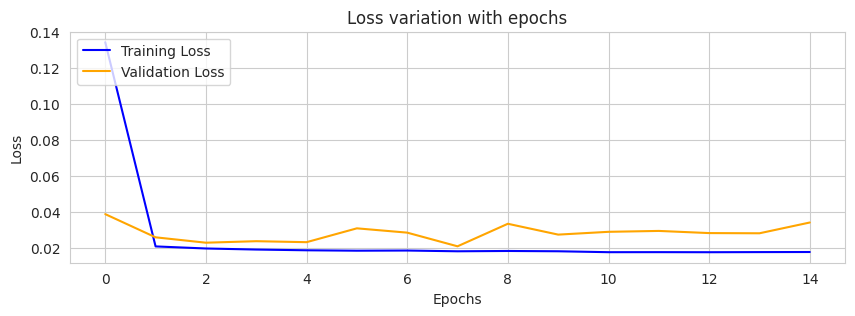

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.plot(hist['loss'], color='blue', label='Training Loss')
plt.plot(hist['val_loss'], color='orange', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss variation with epochs')
plt.legend(loc='upper left')
plt.show()

From train loss and test loss vs epoch graph, we can see that as the val loss slowly starts to increase,the model stops as we had put early stopping in the model. This shows the benefit of early stopping to avoid overfitting in training the neural network.

# Results and Analysis

We plotted the best scores for each classifier.

## 1. Accuracy score

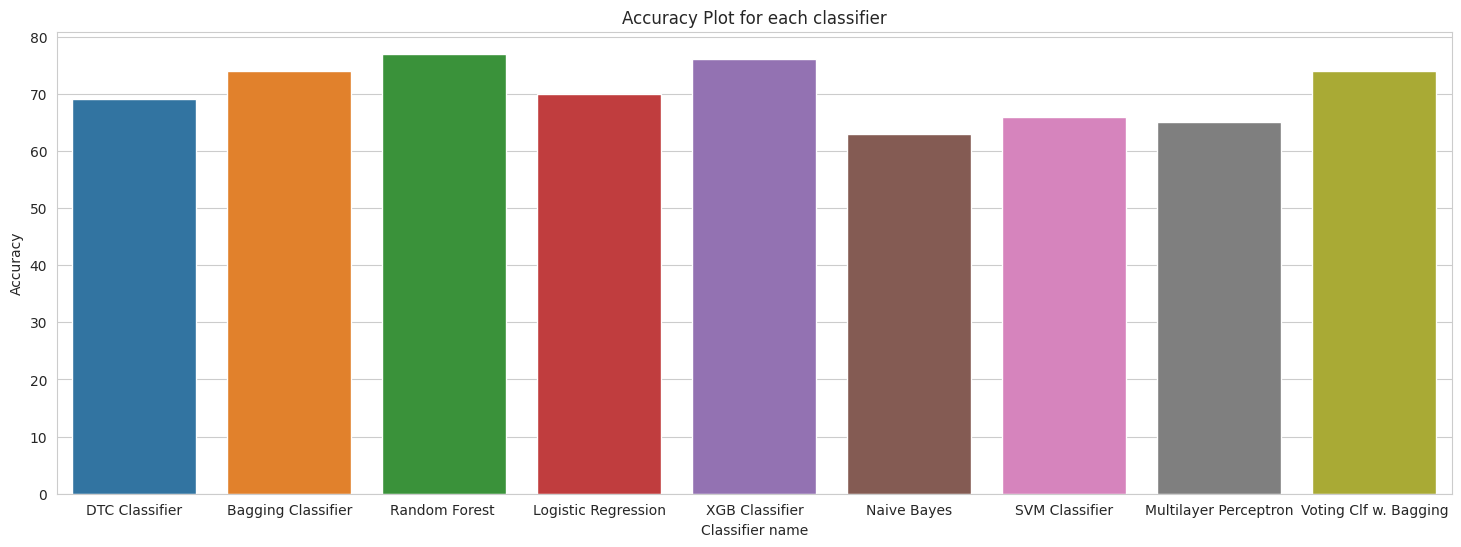

In [ ]:
plt.figure(figsize=(18,6))
plt.title('Accuracy Plot for each classifier')
name_arr=['DTC Classifier','Bagging Classifier','Random Forest ','Logistic Regression','XGB Classifier','Naive Bayes','SVM Classifier','Multilayer Perceptron','Voting Clf w. Bagging']
acc_arr=[69,74,77,70,76,63,66,65,74]
sns.barplot(x=name_arr,y=acc_arr)

plt.xlabel('Classifier name')
plt.ylabel('Accuracy')

plt.show()

## 2. F1- Score (of +ve class)

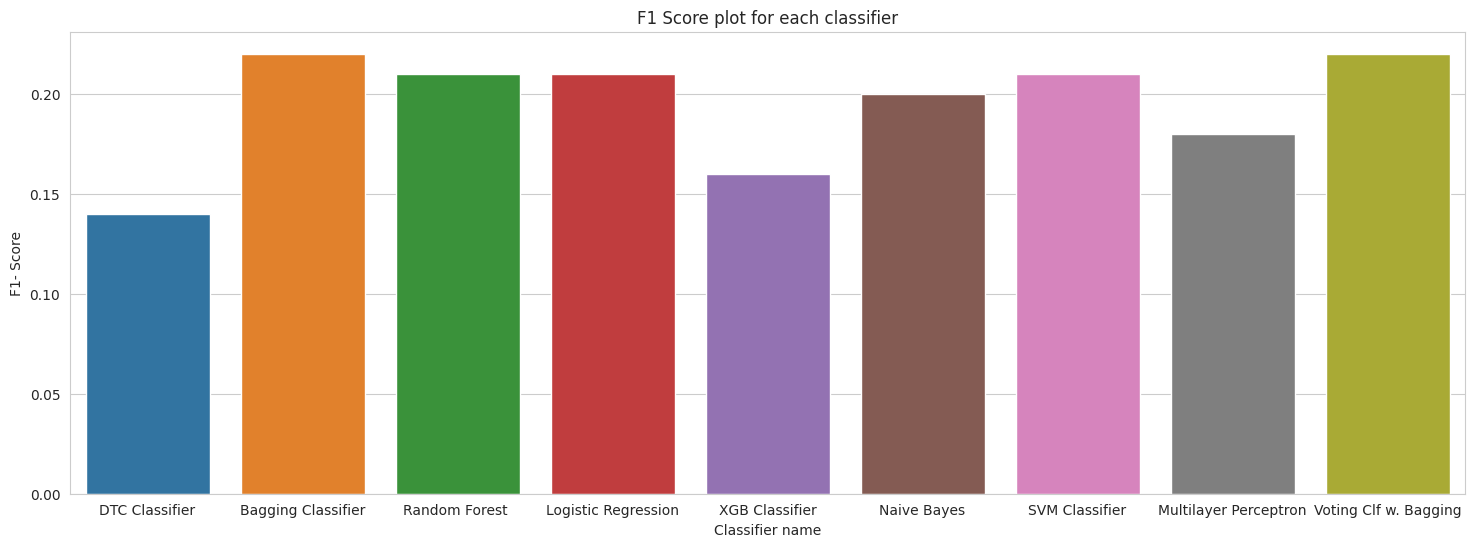

In [ ]:
plt.figure(figsize=(18,6))
plt.title('F1 Score plot for each classifier')
name_arr=['DTC Classifier','Bagging Classifier','Random Forest ','Logistic Regression','XGB Classifier','Naive Bayes','SVM Classifier','Multilayer Perceptron','Voting Clf w. Bagging']
f1_sc=[0.14,0.22,0.21,0.21,0.16,0.2,0.21,0.18,0.22]

sns.barplot(x=name_arr,y=f1_sc)

plt.xlabel('Classifier name')
plt.ylabel('F1- Score')

plt.show()

## 3. Recall (of +ve class)

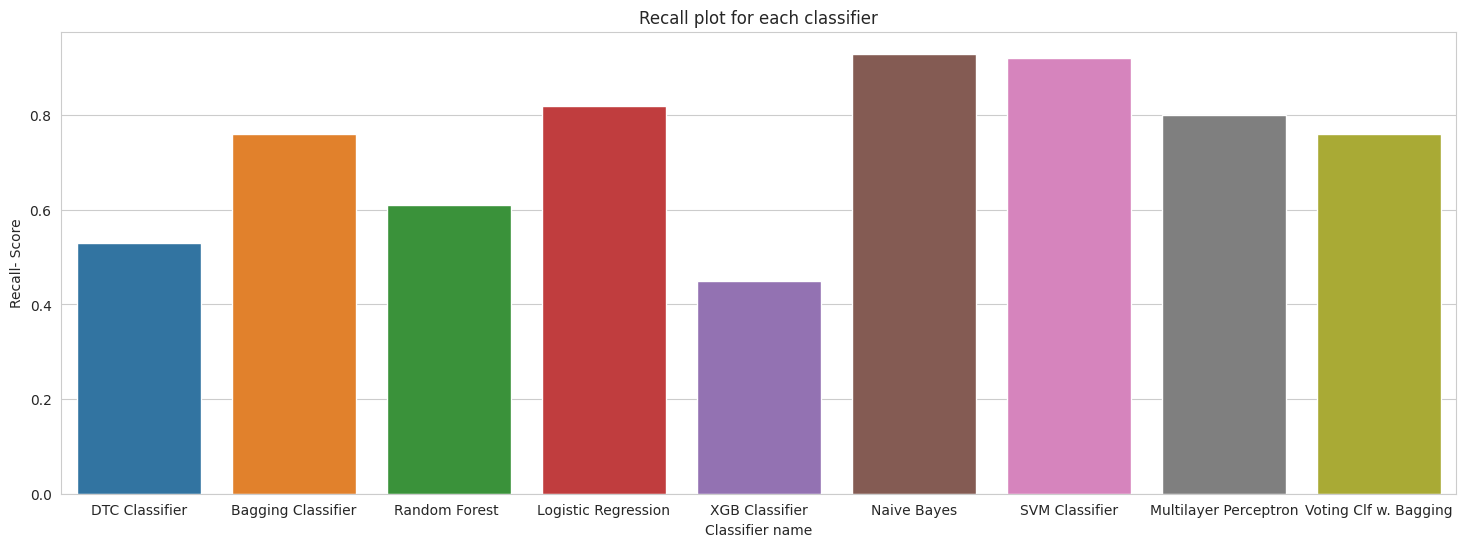

In [ ]:
plt.figure(figsize=(18,6))
plt.title('Recall plot for each classifier')
name_arr=['DTC Classifier','Bagging Classifier','Random Forest ','Logistic Regression','XGB Classifier','Naive Bayes','SVM Classifier','Multilayer Perceptron','Voting Clf w. Bagging']
re_sc=[0.53,0.76,0.61,0.82,0.45,0.93,0.92,0.80,0.76]

sns.barplot(x=name_arr,y=re_sc)

plt.xlabel('Classifier name')
plt.ylabel('Recall- Score')

plt.show()